# Preprocesamiento con OpenCV - Paso a Paso

In [1]:
# Imports básicos
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import xml.etree.ElementTree as ET

print("🔧 PREPROCESAMIENTO CON OPENCV")
print("=" * 50)

🔧 PREPROCESAMIENTO CON OPENCV


In [2]:
current_dir = Path(os.getcwd())
print(f"📁 Directorio actual: {current_dir}")

if current_dir.name == 'notebooks':
    PROJECT_DIR = current_dir.parent
else:
    PROJECT_DIR = current_dir

DATA_DIR = PROJECT_DIR / 'data' / 'raw'
print(f"📁 Directorio del proyecto: {PROJECT_DIR}")
print(f"📁 Directorio de datos: {DATA_DIR}")
print(f"📁 Existe: {DATA_DIR.exists()}")

# Verificar contenido
if DATA_DIR.exists():
    datasets = [d for d in DATA_DIR.iterdir() if d.is_dir()]
    print(f"📊 Datasets encontrados: {len(datasets)}")
    for dataset in datasets:
        print(f"  - {dataset.name}")

📁 Directorio actual: /home/edwlearn/vehicle-document-system/notebooks
📁 Directorio del proyecto: /home/edwlearn/vehicle-document-system
📁 Directorio de datos: /home/edwlearn/vehicle-document-system/data/raw
📁 Existe: True
📊 Datasets encontrados: 4
  - ev_registration
  - car_plate_detection
  - odometer_dataset
  - document_ocr


In [3]:
# Paso 2: Explorar archivos XML del dataset de placas
car_plate_dir = DATA_DIR / 'car_plate_detection'
print(f"📁 Buscando en: {car_plate_dir}")

# Listar archivos XML y PNG
xml_files = list(car_plate_dir.glob('*.xml'))
png_files = list(car_plate_dir.glob('*.png'))

print(f"📋 Archivos encontrados:")
print(f"  XML (anotaciones): {len(xml_files)}")
print(f"  PNG (imágenes): {len(png_files)}")

# Mostrar primeros archivos
print(f"\n📄 Primeros 5 archivos XML:")
for xml_file in xml_files[:5]:
    print(f"  {xml_file.name}")

📁 Buscando en: /home/edwlearn/vehicle-document-system/data/raw/car_plate_detection
📋 Archivos encontrados:
  XML (anotaciones): 0
  PNG (imágenes): 0

📄 Primeros 5 archivos XML:


In [4]:
# Debugging: Ver contenido real de las carpetas
print("🔍 DEBUGGING - Explorando contenido real:")
print("=" * 50)

for dataset_name in ['car_plate_detection', 'odometer_dataset', 'document_ocr']:
    dataset_path = DATA_DIR / dataset_name
    print(f"\n📁 {dataset_name}:")
    print(f"   Ruta: {dataset_path}")
    print(f"   Existe: {dataset_path.exists()}")
    
    if dataset_path.exists():
        # Listar TODO el contenido
        all_items = list(dataset_path.rglob("*"))
        print(f"   Total items: {len(all_items)}")
        
        # Mostrar primeros 10 items
        print("   Contenido:")
        for item in all_items[:10]:
            if item.is_file():
                print(f"     📄 {item.name} ({item.suffix})")
            elif item.is_dir():
                print(f"     📁 {item.name}/")
        
        if len(all_items) > 10:
            print(f"     ... y {len(all_items) - 10} más")

🔍 DEBUGGING - Explorando contenido real:

📁 car_plate_detection:
   Ruta: /home/edwlearn/vehicle-document-system/data/raw/car_plate_detection
   Existe: True
   Total items: 868
   Contenido:
     📁 annotations/
     📁 images/
     📄 Cars134.xml (.xml)
     📄 Cars317.xml (.xml)
     📄 Cars295.xml (.xml)
     📄 Cars265.xml (.xml)
     📄 Cars313.xml (.xml)
     📄 Cars404.xml (.xml)
     📄 Cars311.xml (.xml)
     📄 Cars385.xml (.xml)
     ... y 858 más

📁 odometer_dataset:
   Ruta: /home/edwlearn/vehicle-document-system/data/raw/odometer_dataset
   Existe: True
   Total items: 181
   Contenido:
     📁 bike and car odometer/
     📁 bike/
     📁 car/
     📄 20210408_06_56_24_000_kG02JFtBNwY37NXIevVfNrfummb2_F_3264_2448.jpg (.jpg)
     📄 20210329_23_28_53_000_b58ZZ9m5wBSwHo34T9ce6RPCj2Y2_F_3000_4000.jpg (.jpg)
     📄 20210408_23_18_50_000_MBPpQrKbv6btQPYKIHCeEYz1Ppl2_F_3264_2448.jpg (.jpg)
     📄 20210326_00_18_21_000_bFf7mjfpLJdHjH3GXc7mFXLZFuP2_F_3096_4128.jpg (.jpg)
     📄 20210330_06_36_

In [5]:
# Paso 3: Buscar archivos en la estructura real
car_plate_dir = DATA_DIR / 'car_plate_detection'

# Buscar en subcarpetas también
xml_files = list(car_plate_dir.rglob('*.xml'))  # rglob busca recursivamente
png_files = list(car_plate_dir.rglob('*.png'))
jpg_files = list(car_plate_dir.rglob('*.jpg'))

print(f"📋 Archivos encontrados (búsqueda recursiva):")
print(f"  XML (anotaciones): {len(xml_files)}")
print(f"  PNG (imágenes): {len(png_files)}")
print(f"  JPG (imágenes): {len(jpg_files)}")

# Explorar subcarpetas específicas
annotations_dir = car_plate_dir / 'annotations'
images_dir = car_plate_dir / 'images'

print(f"\n📁 Estructura específica:")
print(f"  annotations/: {annotations_dir.exists()}")
print(f"  images/: {images_dir.exists()}")

if annotations_dir.exists():
    xml_in_annotations = list(annotations_dir.glob('*.xml'))
    print(f"  XML en annotations/: {len(xml_in_annotations)}")

if images_dir.exists():
    images_in_folder = list(images_dir.glob('*'))
    print(f"  Imágenes en images/: {len(images_in_folder)}")
    # Mostrar tipos de archivo
    extensions = {}
    for img in images_in_folder:
        ext = img.suffix.lower()
        extensions[ext] = extensions.get(ext, 0) + 1
    print(f"  Tipos: {extensions}")

# Mostrar primeros archivos encontrados
print(f"\n📄 Primeros 5 archivos XML:")
for xml_file in xml_files[:5]:
    print(f"  {xml_file.relative_to(car_plate_dir)}")

📋 Archivos encontrados (búsqueda recursiva):
  XML (anotaciones): 433
  PNG (imágenes): 433
  JPG (imágenes): 0

📁 Estructura específica:
  annotations/: True
  images/: True
  XML en annotations/: 433
  Imágenes en images/: 433
  Tipos: {'.png': 433}

📄 Primeros 5 archivos XML:
  annotations/Cars134.xml
  annotations/Cars317.xml
  annotations/Cars295.xml
  annotations/Cars265.xml
  annotations/Cars313.xml


In [6]:
# Paso 4: Analizar estructura de archivo XML
def mostrar_contenido_xml(xml_path):
    """Muestra el contenido de un archivo XML de manera legible"""
    with open(xml_path, 'r') as file:
        contenido = file.read()
    print(f"📄 Archivo: {xml_path.name}")
    print("-" * 50)
    print(contenido)
    print("-" * 50)

# Leer primer archivo XML para entender la estructura
if xml_files:
    primer_xml = xml_files[0]
    mostrar_contenido_xml(primer_xml)
else:
    print("❌ No se encontraron archivos XML")


📄 Archivo: Cars134.xml
--------------------------------------------------

<annotation>
    <folder>images</folder>
    <filename>Cars134.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>licence</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>76</xmin>
            <ymin>151</ymin>
            <xmax>133</xmax>
            <ymax>174</ymax>
        </bndbox>
    </object>
</annotation>
--------------------------------------------------


In [7]:
# Paso 5: Crear función para extraer información del XML
def parse_xml_annotation(xml_path):
    """Extrae información útil del archivo XML"""
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # Información básica
        filename = root.find('filename').text if root.find('filename') is not None else "unknown"
        
        # Dimensiones de la imagen
        size = root.find('size')
        if size is not None:
            width = int(size.find('width').text)
            height = int(size.find('height').text)
            depth = int(size.find('depth').text)
        else:
            width = height = depth = 0
        
        # Objetos detectados (bounding boxes)
        objects = []
        for obj in root.findall('object'):
            name = obj.find('name').text if obj.find('name') is not None else "unknown"
            bbox = obj.find('bndbox')
            
            if bbox is not None:
                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)
                
                objects.append({
                    'name': name,
                    'xmin': xmin, 'ymin': ymin,
                    'xmax': xmax, 'ymax': ymax,
                    'width': xmax - xmin,
                    'height': ymax - ymin
                })
        
        return {
            'filename': filename,
            'image_width': width,
            'image_height': height,
            'image_depth': depth,
            'objects': objects
        }
    except Exception as e:
        print(f"❌ Error procesando {xml_path.name}: {e}")
        return None

# Probar con el primer archivo
if xml_files:
    resultado = parse_xml_annotation(xml_files[0])
    if resultado:
        print("✅ Parsing exitoso!")
        print(f"📄 Archivo de imagen: {resultado['filename']}")
        print(f"📐 Dimensiones: {resultado['image_width']}x{resultado['image_height']}")
        print(f"🎯 Objetos encontrados: {len(resultado['objects'])}")
        
        for i, obj in enumerate(resultado['objects']):
            print(f"   Objeto {i+1}: {obj['name']} - Box: ({obj['xmin']},{obj['ymin']}) a ({obj['xmax']},{obj['ymax']})")

✅ Parsing exitoso!
📄 Archivo de imagen: Cars134.png
📐 Dimensiones: 400x267
🎯 Objetos encontrados: 1
   Objeto 1: licence - Box: (76,151) a (133,174)


📁 Buscando imágenes en: /home/edwlearn/vehicle-document-system/data/raw/car_plate_detection/images
📸 Cargada: Cars134.png
📐 Dimensiones reales: (267, 400, 3)
🎯 licence: 57x23 pixels


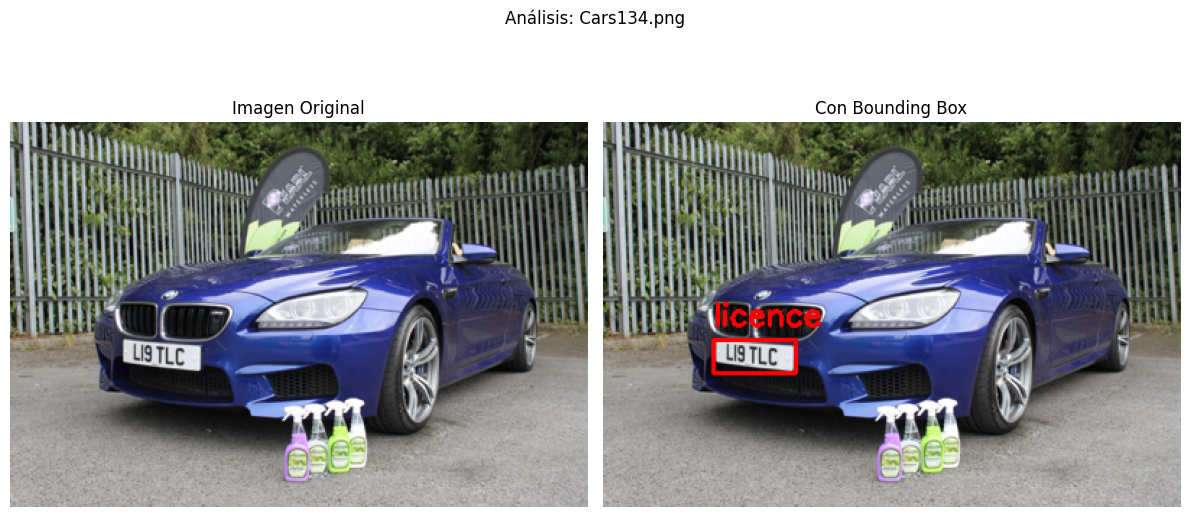

In [8]:
# Paso 6: Mostrar imagen con su bounding box
def mostrar_imagen_con_bbox(annotation_data, images_dir):
    """Muestra imagen original con el bounding box dibujado"""
    
    # Buscar archivo de imagen
    image_path = images_dir / annotation_data['filename']
    
    if not image_path.exists():
        print(f"❌ Imagen no encontrada: {image_path}")
        return
    
    # Cargar imagen
    img = cv2.imread(str(image_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    print(f"📸 Cargada: {annotation_data['filename']}")
    print(f"📐 Dimensiones reales: {img_rgb.shape}")
    
    # Crear copia para dibujar
    img_with_bbox = img_rgb.copy()
    
    # Dibujar cada bounding box
    for obj in annotation_data['objects']:
        x1, y1 = obj['xmin'], obj['ymin']
        x2, y2 = obj['xmax'], obj['ymax']
        
        # Dibujar rectángulo (color rojo)
        cv2.rectangle(img_with_bbox, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        # Agregar etiqueta
        label = f"{obj['name']}"
        cv2.putText(img_with_bbox, label, (x1, y1-10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
        
        print(f"🎯 {obj['name']}: {obj['width']}x{obj['height']} pixels")
    
    # Mostrar lado a lado
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Imagen Original")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img_with_bbox)
    plt.title("Con Bounding Box")
    plt.axis('off')
    
    plt.suptitle(f"Análisis: {annotation_data['filename']}")
    plt.tight_layout()
    plt.show()

# Probar con el primer ejemplo
images_dir = car_plate_dir / 'images'
print(f"📁 Buscando imágenes en: {images_dir}")

if xml_files and images_dir.exists():
    primera_anotacion = parse_xml_annotation(xml_files[0])
    if primera_anotacion:
        mostrar_imagen_con_bbox(primera_anotacion, images_dir)

In [9]:
# Paso 7: Crear funciones básicas de preprocesamiento
class ImagePreprocessor:
    """Clase simple para preprocesamiento de imágenes"""
    
    def __init__(self, target_size=(224, 224)):
        self.target_size = target_size
        print(f"🔧 Preprocessor creado - Tamaño objetivo: {target_size}")
    
    def resize_image(self, image):
        """Redimensiona imagen al tamaño objetivo"""
        return cv2.resize(image, self.target_size, interpolation=cv2.INTER_AREA)
    
    def enhance_contrast(self, image, alpha=1.5):
        """Mejora el contraste de la imagen"""
        return cv2.convertScaleAbs(image, alpha=alpha, beta=0)
    
    def extract_roi(self, image, bbox):
        """Extrae región de interés basada en bounding box"""
        x1, y1 = bbox['xmin'], bbox['ymin']
        x2, y2 = bbox['xmax'], bbox['ymax']
        return image[y1:y2, x1:x2]

# Crear preprocessor
preprocessor = ImagePreprocessor(target_size=(224, 224))

🔧 Preprocessor creado - Tamaño objetivo: (224, 224)


🔄 Procesando: Cars134.png
📐 Original: (267, 400, 3)
🎯 ROI extraída: (23, 57, 3) → (224, 224, 3)


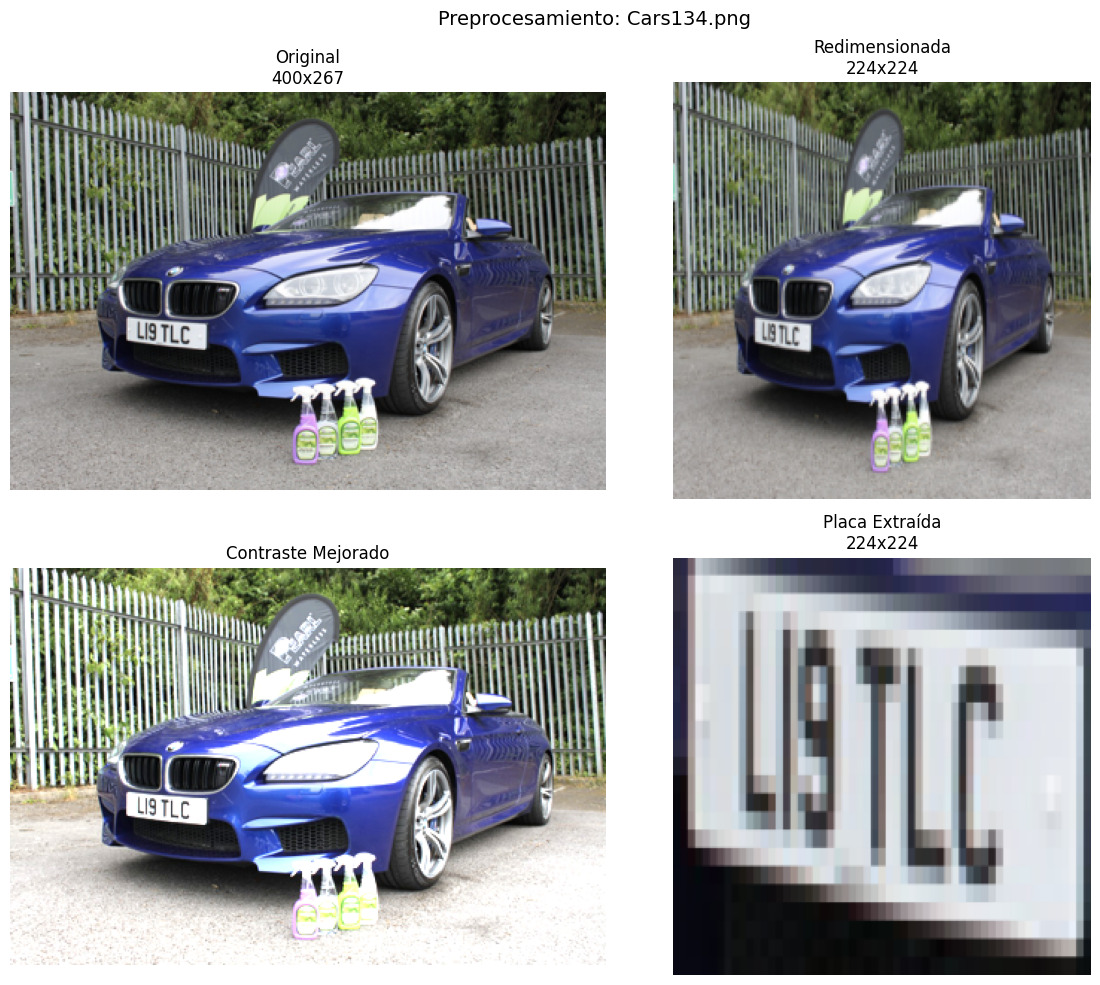

✅ Preprocesamiento completado!


In [10]:
# Paso 8: Aplicar preprocesamiento a nuestra primera imagen
def demostrar_preprocesamiento(annotation_data, images_dir):
    """Demuestra diferentes técnicas de preprocesamiento"""
    
    # Cargar imagen
    image_path = images_dir / annotation_data['filename']
    img = cv2.imread(str(image_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    print(f"🔄 Procesando: {annotation_data['filename']}")
    print(f"📐 Original: {img_rgb.shape}")
    
    # Aplicar procesamientos
    resized = preprocessor.resize_image(img_rgb)
    enhanced = preprocessor.enhance_contrast(img_rgb)
    
    # Extraer ROI (región de la placa)
    roi = None
    if annotation_data['objects']:
        bbox = annotation_data['objects'][0]  # Primera placa
        roi = preprocessor.extract_roi(img_rgb, bbox)
        roi_resized = preprocessor.resize_image(roi)
        print(f"🎯 ROI extraída: {roi.shape} → {roi_resized.shape}")
    
    # Visualizar resultados
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Preprocesamiento: {annotation_data['filename']}", fontsize=14)
    
    # Original
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title(f"Original\n{img_rgb.shape[1]}x{img_rgb.shape[0]}")
    axes[0, 0].axis('off')
    
    # Redimensionada
    axes[0, 1].imshow(resized)
    axes[0, 1].set_title(f"Redimensionada\n{resized.shape[1]}x{resized.shape[0]}")
    axes[0, 1].axis('off')
    
    # Contraste mejorado
    axes[1, 0].imshow(enhanced)
    axes[1, 0].set_title("Contraste Mejorado")
    axes[1, 0].axis('off')
    
    # ROI de la placa
    if roi is not None:
        axes[1, 1].imshow(roi_resized)
        axes[1, 1].set_title(f"Placa Extraída\n{roi_resized.shape[1]}x{roi_resized.shape[0]}")
    else:
        axes[1, 1].text(0.5, 0.5, 'No ROI', ha='center', va='center')
        axes[1, 1].set_title("ROI")
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'original': img_rgb,
        'resized': resized, 
        'enhanced': enhanced,
        'roi': roi_resized if roi is not None else None
    }

# Aplicar a nuestra primera imagen
if xml_files:
    primera_anotacion = parse_xml_annotation(xml_files[0])
    if primera_anotacion:
        resultados = demostrar_preprocesamiento(primera_anotacion, images_dir)
        print("✅ Preprocesamiento completado!")

In [11]:
# Paso 9: Procesar múltiples imágenes para encontrar patrones
def procesar_multiple_imagenes(num_imagenes=10):
    """Procesa varias imágenes y recopila estadísticas"""
    
    print(f"🔄 Procesando {num_imagenes} imágenes...")
    print("=" * 50)
    
    estadisticas = []
    imagenes_procesadas = []
    
    for i, xml_file in enumerate(xml_files[:num_imagenes]):
        # Parsear anotación
        annotation = parse_xml_annotation(xml_file)
        if not annotation:
            continue
            
        # Verificar que existe la imagen
        image_path = images_dir / annotation['filename']
        if not image_path.exists():
            continue
            
        # Cargar imagen
        img = cv2.imread(str(image_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Recopilar estadísticas
        stats = {
            'filename': annotation['filename'],
            'image_width': img_rgb.shape[1],
            'image_height': img_rgb.shape[0],
            'num_objects': len(annotation['objects'])
        }
        
        # Estadísticas de bounding boxes
        for obj in annotation['objects']:
            stats[f'bbox_width'] = obj['width']
            stats[f'bbox_height'] = obj['height']
            stats[f'bbox_area'] = obj['width'] * obj['height']
            stats[f'bbox_ratio'] = obj['width'] / obj['height']
            
        estadisticas.append(stats)
        imagenes_procesadas.append({
            'annotation': annotation,
            'image': img_rgb
        })
        
        print(f"✅ {i+1}. {annotation['filename']} - {stats['image_width']}x{stats['image_height']} - {stats['num_objects']} objetos")
    
    return estadisticas, imagenes_procesadas

# Ejecutar análisis
stats, procesadas = procesar_multiple_imagenes(10)

# Mostrar resumen estadístico
if stats:
    import pandas as pd
    df_stats = pd.DataFrame(stats)
    print(f"\n📊 RESUMEN ESTADÍSTICO ({len(stats)} imágenes):")
    print("=" * 50)
    print(df_stats.describe())

🔄 Procesando 10 imágenes...
✅ 1. Cars134.png - 400x267 - 1 objetos
✅ 2. Cars317.png - 400x300 - 1 objetos
✅ 3. Cars295.png - 400x256 - 2 objetos
✅ 4. Cars265.png - 400x218 - 1 objetos
✅ 5. Cars313.png - 400x319 - 1 objetos
✅ 6. Cars404.png - 370x400 - 1 objetos
✅ 7. Cars311.png - 400x267 - 2 objetos
✅ 8. Cars385.png - 400x250 - 1 objetos
✅ 9. Cars143.png - 400x267 - 2 objetos
✅ 10. Cars307.png - 600x417 - 1 objetos

📊 RESUMEN ESTADÍSTICO (10 imágenes):
       image_width  image_height  num_objects  bbox_width  bbox_height  \
count    10.000000     10.000000    10.000000   10.000000    10.000000   
mean    417.000000    296.100000     1.300000  101.200000    36.700000   
std      64.987178     65.255821     0.483046   85.434575    32.034877   
min     370.000000    218.000000     1.000000   28.000000     7.000000   
25%     400.000000    258.750000     1.000000   39.750000    18.250000   
50%     400.000000    267.000000     1.000000   74.500000    29.000000   
75%     400.000000    314

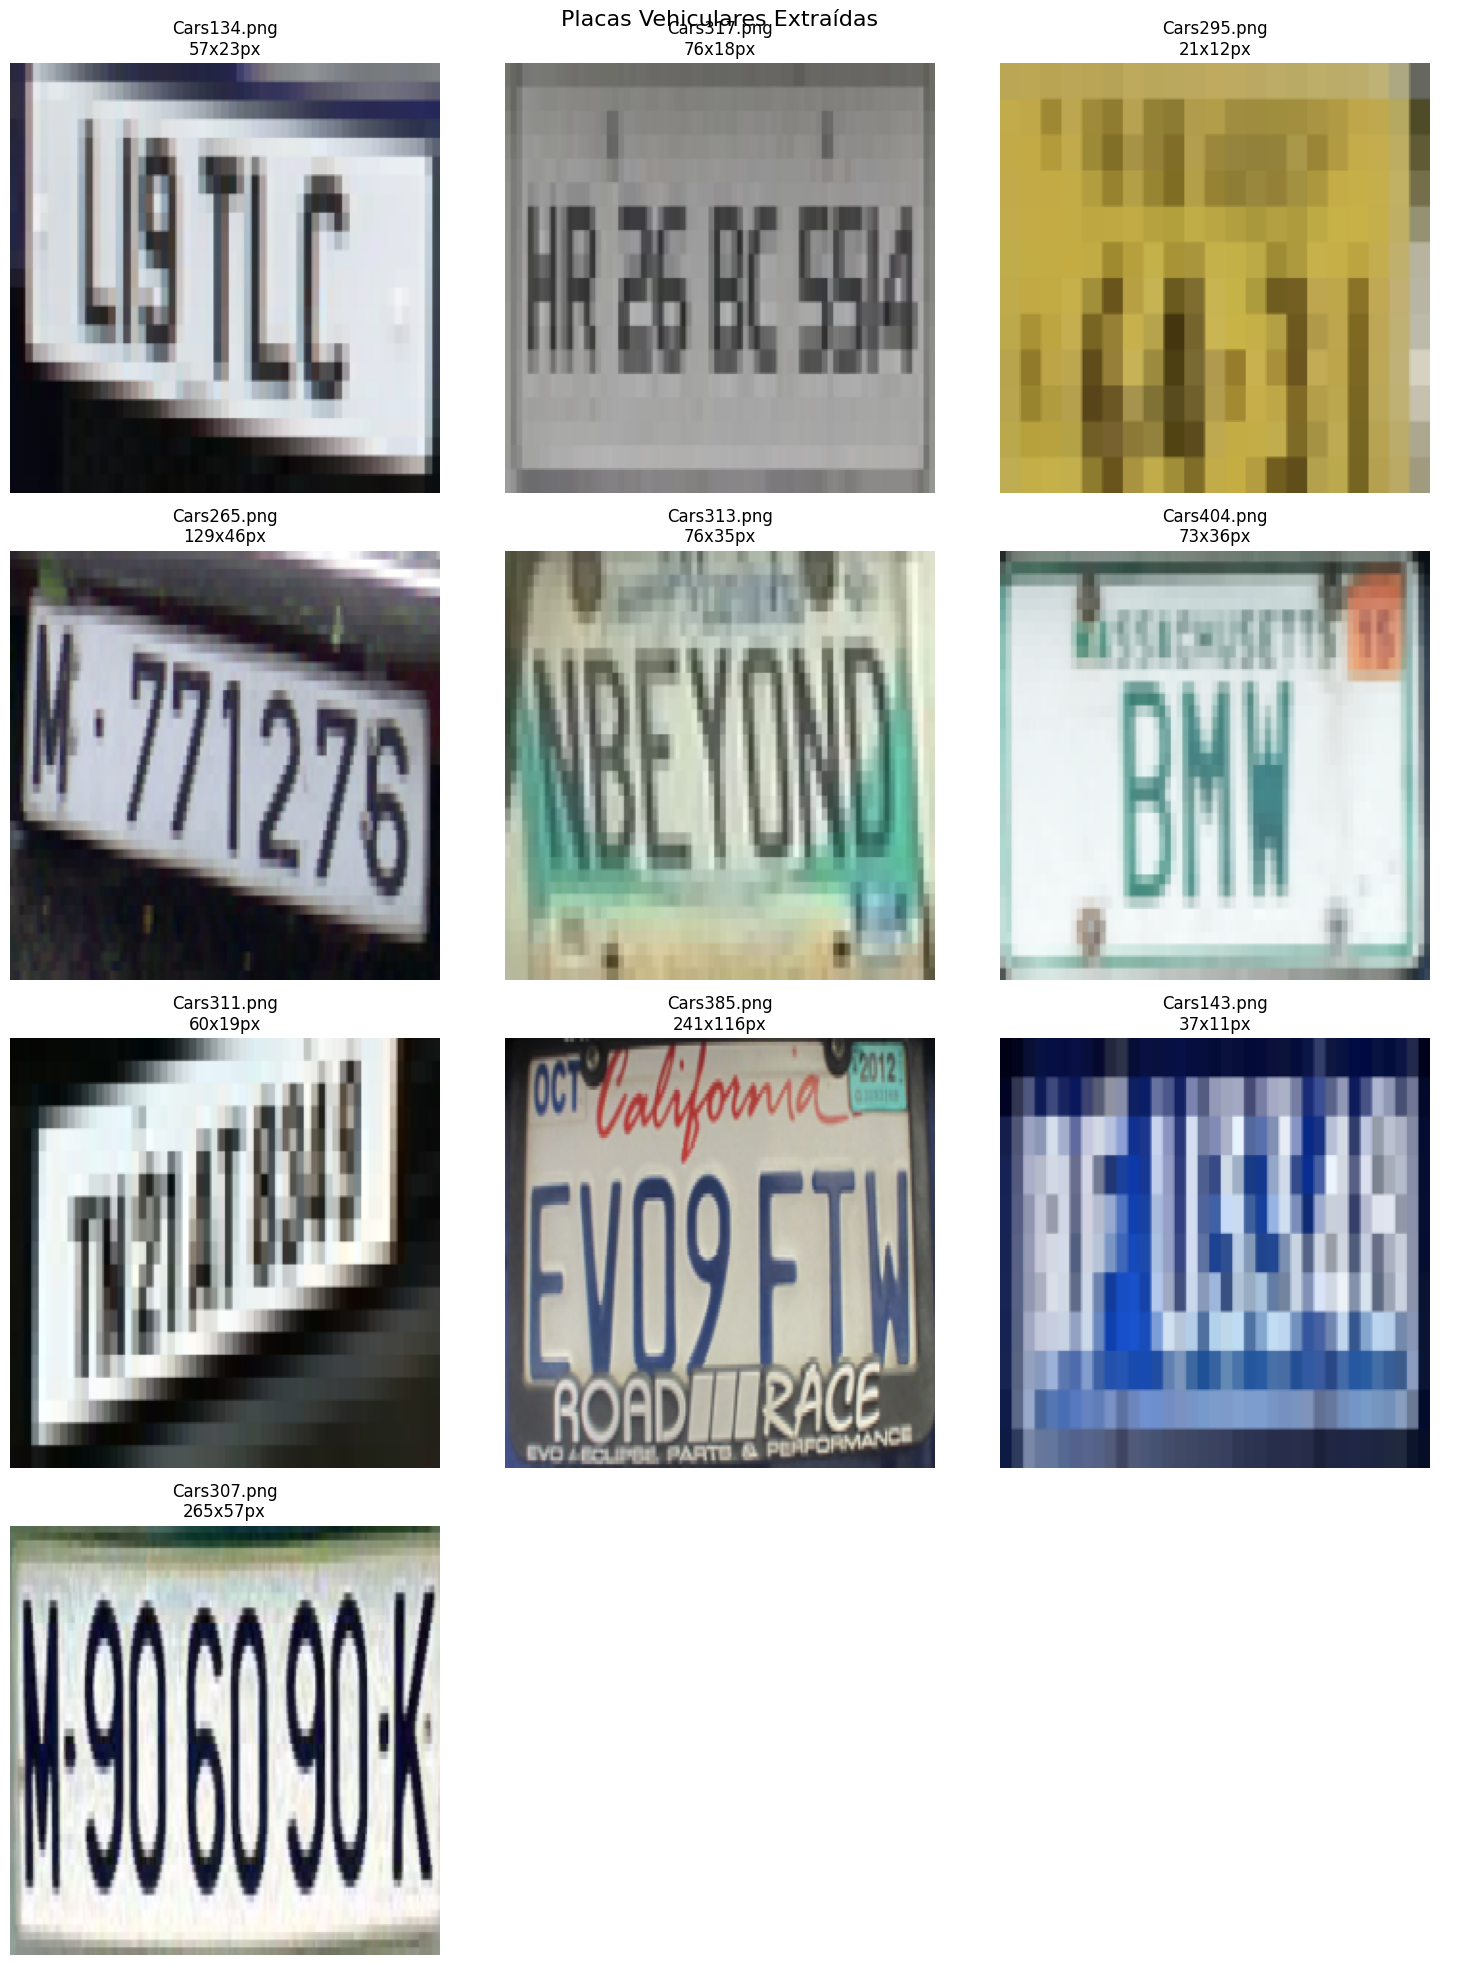

✅ Mostradas 10 placas extraídas


In [12]:
# Paso 10: Mostrar grid de placas extraídas
def mostrar_placas_extraidas(imagenes_procesadas):
    """Muestra un grid con todas las placas extraídas"""
    
    num_imagenes = len(imagenes_procesadas)
    cols = 3
    rows = (num_imagenes + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    fig.suptitle("Placas Vehiculares Extraídas", fontsize=16)
    
    # Asegurar que axes sea siempre un array 2D
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, data in enumerate(imagenes_procesadas):
        row, col = i // cols, i % cols
        
        annotation = data['annotation']
        image = data['image']
        
        # Extraer ROI de la primera placa
        if annotation['objects']:
            bbox = annotation['objects'][0]
            roi = preprocessor.extract_roi(image, bbox)
            roi_resized = preprocessor.resize_image(roi)
            
            # Mostrar placa extraída
            axes[row, col].imshow(roi_resized)
            axes[row, col].set_title(f"{annotation['filename']}\n{bbox['width']}x{bbox['height']}px")
        else:
            axes[row, col].text(0.5, 0.5, 'Sin placa', ha='center', va='center')
            axes[row, col].set_title(f"{annotation['filename']}\nSin detección")
            
        axes[row, col].axis('off')
    
    # Ocultar axes vacías
    for i in range(num_imagenes, rows * cols):
        row, col = i // cols, i % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar grid de placas
if procesadas:
    mostrar_placas_extraidas(procesadas)
    print(f"✅ Mostradas {len(procesadas)} placas extraídas")

🔬 Analizando placa de: Cars143.png


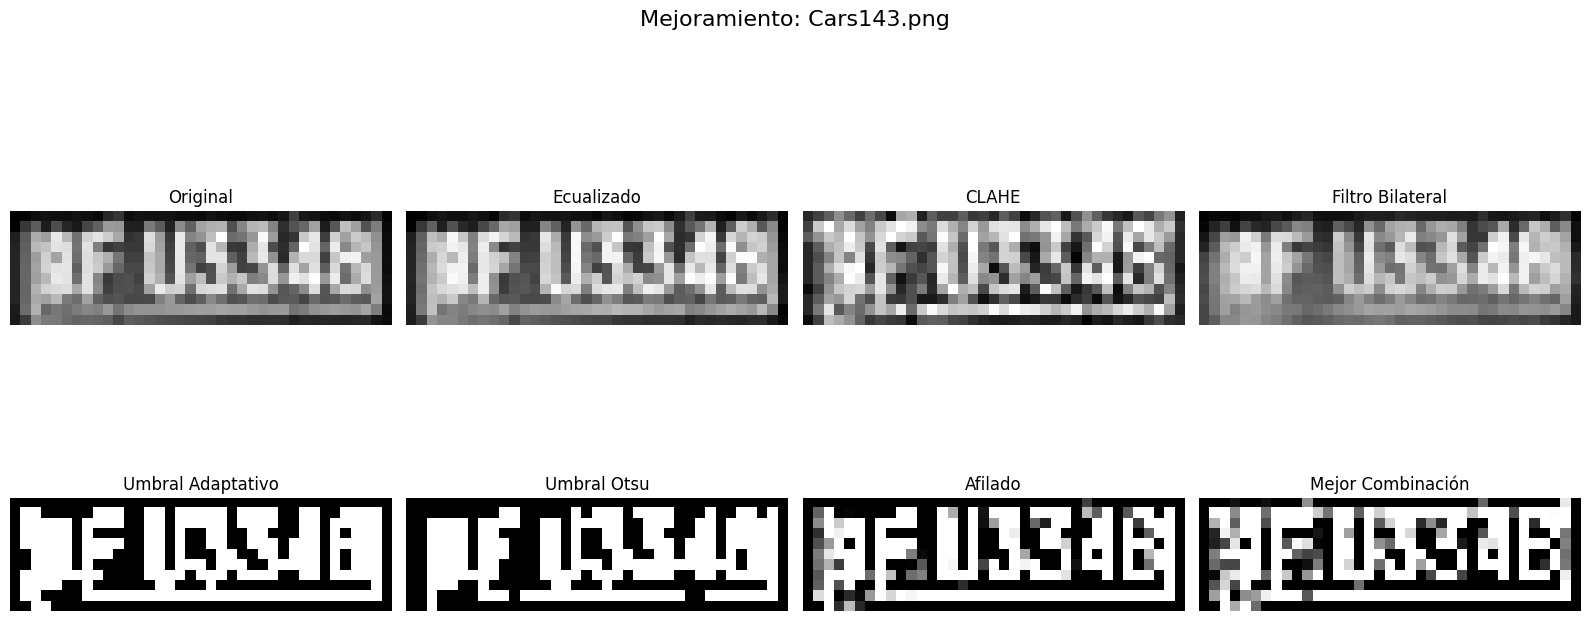

In [13]:
# Paso 11A: Técnicas avanzadas para placas difíciles de leer
def mejorar_placa_dificil(roi_image):
    """Aplica múltiples técnicas para mejorar legibilidad de placas"""
    
    # Convertir a escala de grises
    gray = cv2.cvtColor(roi_image, cv2.COLOR_RGB2GRAY)
    
    # Técnica 1: Ecualización de histograma
    equalized = cv2.equalizeHist(gray)
    
    # Técnica 2: CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_result = clahe.apply(gray)
    
    # Técnica 3: Filtro bilateral (reduce ruido, mantiene bordes)
    bilateral = cv2.bilateralFilter(gray, 9, 75, 75)
    
    # Técnica 4: Umbralización adaptativa
    thresh_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY, 11, 2)
    
    # Técnica 5: Umbralización Otsu
    _, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Técnica 6: Sharpening (afilado)
    kernel_sharpen = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])
    sharpened = cv2.filter2D(gray, -1, kernel_sharpen)
    
    return {
        'original': gray,
        'equalized': equalized,
        'clahe': clahe_result,
        'bilateral': bilateral,
        'thresh_adaptive': thresh_adaptive,
        'thresh_otsu': thresh_otsu,
        'sharpened': sharpened
    }

def mostrar_mejoras_placa(roi_image, titulo="Mejoramiento de Placa"):
    """Muestra todas las técnicas de mejoramiento aplicadas"""
    
    if roi_image is None:
        print("❌ No hay ROI para procesar")
        return
    
    # Aplicar técnicas
    resultados = mejorar_placa_dificil(roi_image)
    
    # Visualizar resultados
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle(titulo, fontsize=16)
    
    tecnicas = [
        ('original', 'Original'),
        ('equalized', 'Ecualizado'),
        ('clahe', 'CLAHE'),
        ('bilateral', 'Filtro Bilateral'),
        ('thresh_adaptive', 'Umbral Adaptativo'),
        ('thresh_otsu', 'Umbral Otsu'),
        ('sharpened', 'Afilado'),
        ('bilateral', 'Mejor Combinación')
    ]
    
    for i, (key, label) in enumerate(tecnicas):
        row, col = i // 4, i % 4
        
        if i == 7:  # Combinación especial para la última
            # Combinar CLAHE + bilateral + sharpening
            combined = cv2.bilateralFilter(resultados['clahe'], 9, 75, 75)
            kernel_sharpen = np.array([[-1,-1,-1], [-1, 9,-1], [-1,-1,-1]])
            combined = cv2.filter2D(combined, -1, kernel_sharpen)
            axes[row, col].imshow(combined, cmap='gray')
        else:
            axes[row, col].imshow(resultados[key], cmap='gray')
            
        axes[row, col].set_title(label)
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return resultados

# Probar con una placa de nuestro dataset
if procesadas:
    # Usar la primera placa
    primera_placa = procesadas[8]
    annotation = primera_placa['annotation']
    image = primera_placa['image']
    
    if annotation['objects']:
        bbox = annotation['objects'][0]
        roi = preprocessor.extract_roi(image, bbox)
        
        print(f"🔬 Analizando placa de: {annotation['filename']}")
        resultados_mejora = mostrar_mejoras_placa(roi, f"Mejoramiento: {annotation['filename']}")

In [14]:
# Paso 12: Guardar dataset procesado para entrenamiento
import os
from tqdm import tqdm

def crear_dataset_procesado():
    """Crea dataset limpio y organizado para entrenamiento"""
    
    # Crear directorios de salida
    processed_base = PROJECT_DIR / 'data' / 'processed' / 'car_plates'
    
    # Directorios para diferentes tipos de datos
    dirs_to_create = {
        'images_full': processed_base / 'images_full',      # Imágenes completas procesadas
        'images_rois': processed_base / 'images_rois',      # Solo las placas extraídas
        'annotations': processed_base / 'annotations',      # Metadatos en JSON
        'train': processed_base / 'train',                  # Para entrenamiento
        'val': processed_base / 'val'                       # Para validación
    }
    
    for name, path in dirs_to_create.items():
        path.mkdir(parents=True, exist_ok=True)
        print(f"📁 Creado: {name} -> {path.relative_to(PROJECT_DIR)}")
    
    return dirs_to_create

# Crear estructura
output_dirs = crear_dataset_procesado()

📁 Creado: images_full -> data/processed/car_plates/images_full
📁 Creado: images_rois -> data/processed/car_plates/images_rois
📁 Creado: annotations -> data/processed/car_plates/annotations
📁 Creado: train -> data/processed/car_plates/train
📁 Creado: val -> data/processed/car_plates/val


In [15]:
# Procesar y guardar todas las imágenes
def procesar_y_guardar_dataset(max_images=500):  # Empezar con 20 para probar
    """Procesa y guarda imágenes en formato estándar"""
    
    print(f"🔄 Procesando {max_images} imágenes...")
    
    dataset_info = []
    count_saved = 0
    
    for i, xml_file in enumerate(tqdm(xml_files[:max_images])):
        try:
            # Parsear anotación
            annotation = parse_xml_annotation(xml_file)
            if not annotation or not annotation['objects']:
                continue
                
            # Verificar imagen existe
            image_path = images_dir / annotation['filename']
            if not image_path.exists():
                continue
                
            # Cargar imagen
            img = cv2.imread(str(image_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Procesar imagen completa
            img_resized = preprocessor.resize_image(img_rgb)
            img_enhanced = preprocessor.enhance_contrast(img_resized)
            
            # Extraer y procesar ROI de cada placa
            for j, obj in enumerate(annotation['objects']):
                # Extraer ROI original
                roi_original = preprocessor.extract_roi(img_rgb, obj)
                
                # Aplicar mejoramiento a la ROI
                roi_enhanced = mejorar_placa_dificil(roi_original)
                
                # Redimensionar ROI para entrenamiento
                roi_resized = preprocessor.resize_image(roi_original)
                
                # Generar nombres únicos
                base_name = f"plate_{count_saved:04d}"
                
                # Guardar imagen completa procesada
                full_img_path = output_dirs['images_full'] / f"{base_name}_full.jpg"
                img_bgr = cv2.cvtColor(img_enhanced, cv2.COLOR_RGB2BGR)
                cv2.imwrite(str(full_img_path), img_bgr)
                
                # Guardar ROI original redimensionada
                roi_path = output_dirs['images_rois'] / f"{base_name}_roi.jpg"
                roi_bgr = cv2.cvtColor(roi_resized, cv2.COLOR_RGB2BGR)
                cv2.imwrite(str(roi_path), roi_bgr)
                
                # Guardar ROI con mejor procesamiento (CLAHE)
                roi_enhanced_path = output_dirs['images_rois'] / f"{base_name}_enhanced.jpg"
                cv2.imwrite(str(roi_enhanced_path), roi_enhanced['clahe'])
                
                # Información del dataset
                info = {
                    'id': count_saved,
                    'original_file': annotation['filename'],
                    'full_image_path': str(full_img_path.relative_to(PROJECT_DIR)),
                    'roi_path': str(roi_path.relative_to(PROJECT_DIR)),
                    'enhanced_path': str(roi_enhanced_path.relative_to(PROJECT_DIR)),
                    'bbox': {
                        'xmin': obj['xmin'], 'ymin': obj['ymin'],
                        'xmax': obj['xmax'], 'ymax': obj['ymax'],
                        'width': obj['width'], 'height': obj['height']
                    },
                    'class': obj['name'],
                    'image_size': {
                        'original': {'width': img_rgb.shape[1], 'height': img_rgb.shape[0]},
                        'processed': {'width': img_enhanced.shape[1], 'height': img_enhanced.shape[0]},
                        'roi': {'width': roi_resized.shape[1], 'height': roi_resized.shape[0]}
                    }
                }
                
                dataset_info.append(info)
                count_saved += 1
                
        except Exception as e:
            print(f"❌ Error procesando {xml_file.name}: {e}")
            continue
    
    print(f"✅ Procesadas y guardadas: {count_saved} placas")
    return dataset_info

# Ejecutar procesamiento
dataset_metadata = procesar_y_guardar_dataset(433)

🔄 Procesando 433 imágenes...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 433/433 [00:04<00:00, 105.59it/s]

✅ Procesadas y guardadas: 471 placas


In [16]:
# Guardar metadatos y crear splits train/val
import json

def guardar_metadatos_y_splits(dataset_info):
    """Guarda metadatos y crea splits de entrenamiento/validación"""
    
    # Guardar metadatos completos
    metadata_path = output_dirs['annotations'] / 'dataset_metadata.json'
    with open(metadata_path, 'w') as f:
        json.dump(dataset_info, f, indent=2)
    
    print(f"💾 Metadatos guardados: {metadata_path}")
    print(f"📊 Total de muestras: {len(dataset_info)}")
    
    # Crear splits (80% train, 20% val)
    np.random.seed(42)  # Para reproducibilidad
    indices = np.random.permutation(len(dataset_info))
    
    split_point = int(0.8 * len(dataset_info))
    train_indices = indices[:split_point]
    val_indices = indices[split_point:]
    
    train_data = [dataset_info[i] for i in train_indices]
    val_data = [dataset_info[i] for i in val_indices]
    
    # Guardar splits
    train_path = output_dirs['annotations'] / 'train_split.json'
    val_path = output_dirs['annotations'] / 'val_split.json'
    
    with open(train_path, 'w') as f:
        json.dump(train_data, f, indent=2)
    
    with open(val_path, 'w') as f:
        json.dump(val_data, f, indent=2)
    
    print(f"🚂 Train: {len(train_data)} muestras -> {train_path}")
    print(f"🔍 Val: {len(val_data)} muestras -> {val_path}")
    
    # Crear resumen del dataset
    summary = {
        'total_samples': len(dataset_info),
        'train_samples': len(train_data),
        'val_samples': len(val_data),
        'classes': list(set([item['class'] for item in dataset_info])),
        'processed_date': str(pd.Timestamp.now()),
        'source_dataset': 'car_plate_detection',
        'processing_version': '1.0'
    }
    
    summary_path = output_dirs['annotations'] / 'dataset_summary.json'
    with open(summary_path, 'w') as f:
        json.dump(summary, f, indent=2)
    
    print(f"📋 Resumen guardado: {summary_path}")
    
    return train_data, val_data, summary

# Guardar todo
if dataset_metadata:
    train_split, val_split, summary = guardar_metadatos_y_splits(dataset_metadata)
    
    print("\n🎉 DATASET PROCESADO COMPLETADO!")
    print("=" * 50)
    print(f"📁 Ubicación: {output_dirs['images_rois'].parent}")
    print(f"🖼️  Imágenes ROI: {len(dataset_metadata)} archivos")
    print(f"📝 Metadatos: 3 archivos JSON")
    print(f"🚂 Entrenamiento: {len(train_split)} muestras")
    print(f"🔍 Validación: {len(val_split)} muestras")

💾 Metadatos guardados: /home/edwlearn/vehicle-document-system/data/processed/car_plates/annotations/dataset_metadata.json
📊 Total de muestras: 471
🚂 Train: 376 muestras -> /home/edwlearn/vehicle-document-system/data/processed/car_plates/annotations/train_split.json
🔍 Val: 95 muestras -> /home/edwlearn/vehicle-document-system/data/processed/car_plates/annotations/val_split.json
📋 Resumen guardado: /home/edwlearn/vehicle-document-system/data/processed/car_plates/annotations/dataset_summary.json

🎉 DATASET PROCESADO COMPLETADO!
📁 Ubicación: /home/edwlearn/vehicle-document-system/data/processed/car_plates
🖼️  Imágenes ROI: 471 archivos
📝 Metadatos: 3 archivos JSON
🚂 Entrenamiento: 376 muestras
🔍 Validación: 95 muestras


In [17]:
# Verificar que todo se guardó correctamente
def verificar_dataset_guardado():
    """Verificar que los archivos se guardaron bien"""
    
    print("🔍 VERIFICANDO ARCHIVOS GUARDADOS...")
    print("-" * 40)
    
    # Contar archivos en cada directorio
    for name, path in output_dirs.items():
        if path.exists():
            files = list(path.glob("*"))
            print(f"📁 {name}: {len(files)} archivos")
            
            # Mostrar algunos ejemplos
            if files:
                print(f"   Ejemplos: {[f.name for f in files[:3]]}")
        else:
            print(f"❌ {name}: directorio no existe")
    
    # Verificar que podemos cargar metadatos
    metadata_file = output_dirs['annotations'] / 'dataset_metadata.json'
    if metadata_file.exists():
        with open(metadata_file, 'r') as f:
            data = json.load(f)
        print(f"\n✅ Metadatos cargables: {len(data)} entradas")
        
        # Mostrar ejemplo
        if data:
            ejemplo = data[0]
            print("📄 Ejemplo de entrada:")
            print(f"   ID: {ejemplo['id']}")
            print(f"   Archivo original: {ejemplo['original_file']}")
            print(f"   ROI path: {ejemplo['roi_path']}")
            print(f"   Clase: {ejemplo['class']}")

# Ejecutar verificación
verificar_dataset_guardado()

🔍 VERIFICANDO ARCHIVOS GUARDADOS...
----------------------------------------
📁 images_full: 471 archivos
   Ejemplos: ['plate_0194_full.jpg', 'plate_0054_full.jpg', 'plate_0139_full.jpg']
📁 images_rois: 1298 archivos
   Ejemplos: ['plate_0198_roi.jpg', 'odometer_0018_roi.jpg', 'odometer_0091_roi.jpg']
📁 annotations: 4 archivos
   Ejemplos: ['dataset_metadata.json', 'train_split.json', 'val_split.json']
📁 train: 0 archivos
📁 val: 0 archivos

✅ Metadatos cargables: 471 entradas
📄 Ejemplo de entrada:
   ID: 0
   Archivo original: Cars134.png
   ROI path: data/processed/car_plates/images_rois/plate_0000_roi.jpg
   Clase: licence


In [18]:
# Velocimetros dataset

In [19]:
# Paso 19: Explorar estructura real de velocímetros
print("🚀 AGREGANDO DATASET DE VELOCÍMETROS - ANÁLISIS COMPLETO")
print("=" * 60)

odometer_dir = DATA_DIR / 'odometer_dataset'
print(f"📁 Explorando: {odometer_dir}")

# Análisis completo de la estructura
print("\n🔍 ANÁLISIS DE ESTRUCTURA:")

# 1. Archivos en raíz
root_files = list(odometer_dir.glob("*"))
jpg_root = list(odometer_dir.glob("*.jpg"))
print(f"   Archivos en raíz: {len(root_files)}")
print(f"   JPG en raíz: {len(jpg_root)}")

# 2. Todos los subdirectorios
subdirs = [d for d in odometer_dir.iterdir() if d.is_dir()]
print(f"   Subdirectorios: {len(subdirs)}")

# 3. Explorar cada subdirectorio
odometer_images = []

for subdir in subdirs:
    print(f"\n📁 Explorando: {subdir.name}/")
    
    # Archivos en este subdirectorio
    files_in_subdir = list(subdir.glob("*"))
    jpg_in_subdir = list(subdir.glob("*.jpg"))
    
    print(f"   Total archivos: {len(files_in_subdir)}")
    print(f"   JPG files: {len(jpg_in_subdir)}")
    
    # Agregar JPGs encontrados
    odometer_images.extend(jpg_in_subdir)
    
    # Mostrar primeros archivos
    if files_in_subdir:
        print(f"   Primeros archivos:")
        for file in files_in_subdir[:5]:
            if file.is_file():
                size_kb = file.stat().st_size / 1024
                print(f"     📄 {file.name} ({size_kb:.1f} KB)")
            else:
                print(f"     📁 {file.name}/")
        
        if len(files_in_subdir) > 5:
            print(f"     ... y {len(files_in_subdir) - 5} más")
    
    # Explorar sub-subdirectorios si existen
    sub_subdirs = [d for d in subdir.iterdir() if d.is_dir()]
    if sub_subdirs:
        print(f"   Sub-subdirectorios: {[d.name for d in sub_subdirs]}")
        
        for sub_subdir in sub_subdirs:
            sub_jpg = list(sub_subdir.glob("*.jpg"))
            if sub_jpg:
                print(f"     📁 {sub_subdir.name}/: {len(sub_jpg)} JPGs")
                odometer_images.extend(sub_jpg)

# Resultado final
print(f"\n📊 RESUMEN FINAL:")
print(f"   Total imágenes JPG encontradas: {len(odometer_images)}")

# Mostrar primeras imágenes encontradas
if odometer_images:
    print(f"\n📄 Primeras 5 imágenes encontradas:")
    for i, img in enumerate(odometer_images[:5]):
        size_kb = img.stat().st_size / 1024
        print(f"   {i+1}. {img.relative_to(odometer_dir)} ({size_kb:.1f} KB)")
    
    # Test de carga
    test_img = cv2.imread(str(odometer_images[0]))
    if test_img is not None:
        print(f"✅ Test de carga exitoso: {test_img.shape}")
    else:
        print("❌ Error en test de carga")
else:
    print("❌ No se encontraron imágenes JPG")

🚀 AGREGANDO DATASET DE VELOCÍMETROS - ANÁLISIS COMPLETO
📁 Explorando: /home/edwlearn/vehicle-document-system/data/raw/odometer_dataset

🔍 ANÁLISIS DE ESTRUCTURA:
   Archivos en raíz: 1
   JPG en raíz: 0
   Subdirectorios: 1

📁 Explorando: bike and car odometer/
   Total archivos: 2
   JPG files: 0
   Primeros archivos:
     📁 bike/
     📁 car/
   Sub-subdirectorios: ['bike', 'car']
     📁 bike/: 50 JPGs
     📁 car/: 128 JPGs

📊 RESUMEN FINAL:
   Total imágenes JPG encontradas: 178

📄 Primeras 5 imágenes encontradas:
   1. bike and car odometer/bike/20210408_06_56_24_000_kG02JFtBNwY37NXIevVfNrfummb2_F_3264_2448.jpg (2206.2 KB)
   2. bike and car odometer/bike/20210329_23_28_53_000_b58ZZ9m5wBSwHo34T9ce6RPCj2Y2_F_3000_4000.jpg (3759.6 KB)
   3. bike and car odometer/bike/20210408_23_18_50_000_MBPpQrKbv6btQPYKIHCeEYz1Ppl2_F_3264_2448.jpg (3298.7 KB)
   4. bike and car odometer/bike/20210326_00_18_21_000_bFf7mjfpLJdHjH3GXc7mFXLZFuP2_F_3096_4128.jpg (3447.8 KB)
   5. bike and car odometer/bi

🖼️ Mostrando 4 muestras de velocímetros:
✅ 1. 20210408_06_56_24_000_kG02JFtBNwY37NXIevVfNrfummb2_F_3264_2448.jpg: (2448, 3264, 3)
✅ 2. 20210329_23_28_53_000_b58ZZ9m5wBSwHo34T9ce6RPCj2Y2_F_3000_4000.jpg: (4000, 3000, 3)
✅ 3. 20210408_23_18_50_000_MBPpQrKbv6btQPYKIHCeEYz1Ppl2_F_3264_2448.jpg: (3264, 2448, 3)
✅ 4. 20210326_00_18_21_000_bFf7mjfpLJdHjH3GXc7mFXLZFuP2_F_3096_4128.jpg: (4128, 3096, 3)


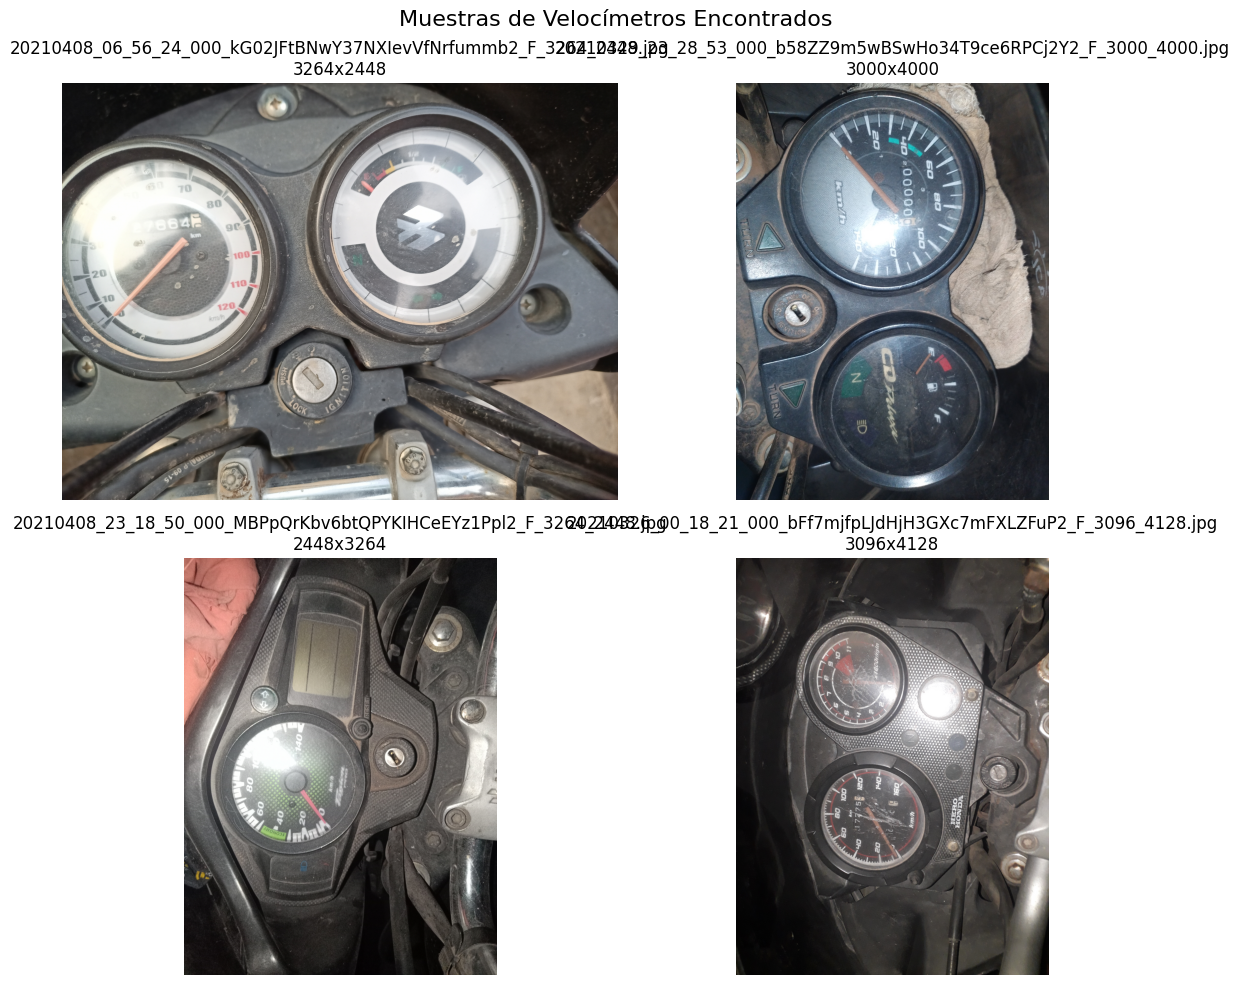

In [20]:
# Mostrar muestras de velocímetros
def mostrar_velocimetros_encontrados(num_muestras=4):
    """Muestra muestras de velocímetros encontrados"""
    
    if len(odometer_images) == 0:
        print("❌ No hay imágenes de velocímetros para mostrar")
        return
    
    print(f"🖼️ Mostrando {min(num_muestras, len(odometer_images))} muestras de velocímetros:")
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Muestras de Velocímetros Encontrados", fontsize=16)
    
    axes = axes.flatten()
    
    for i in range(min(num_muestras, len(odometer_images))):
        img_path = odometer_images[i]
        
        try:
            # Cargar imagen
            img = cv2.imread(str(img_path))
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                axes[i].imshow(img_rgb)
                axes[i].set_title(f"{img_path.name}\n{img_rgb.shape[1]}x{img_rgb.shape[0]}")
                axes[i].axis('off')
                
                print(f"✅ {i+1}. {img_path.name}: {img_rgb.shape}")
            else:
                axes[i].text(0.5, 0.5, 'Error\ncargando', ha='center', va='center')
                axes[i].set_title(f"Error - {img_path.name}")
                axes[i].axis('off')
                print(f"❌ {i+1}. Error cargando: {img_path.name}")
                
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error:\n{str(e)[:20]}', ha='center', va='center')
            axes[i].set_title(f"Error - {img_path.name}")
            axes[i].axis('off')
            print(f"❌ {i+1}. Excepción: {e}")
    
    # Ocultar axes vacías
    for i in range(min(num_muestras, len(odometer_images)), 4):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Ejecutar visualización
mostrar_velocimetros_encontrados(4)

In [21]:
# Paso 20: Procesar velocímetros para el dataset
def procesar_velocimetros_final(max_odometer=200):
    """Procesa imágenes de velocímetros como segunda clase"""
    
    if len(odometer_images) == 0:
        print("❌ No hay imágenes de velocímetros para procesar")
        return []
    
    print(f"🔄 Procesando {min(max_odometer, len(odometer_images))} velocímetros...")
    print("-" * 50)
    
    odometer_data = []
    count = 0
    errores = 0
    
    for img_path in odometer_images[:max_odometer]:
        try:
            # Cargar imagen
            img = cv2.imread(str(img_path))
            if img is None:
                print(f"⚠️ No se pudo cargar: {img_path.name}")
                errores += 1
                continue
                
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            original_shape = img_rgb.shape
            
            # Procesar imagen (mismo pipeline que placas)
            img_resized = preprocessor.resize_image(img_rgb)
            img_enhanced = preprocessor.enhance_contrast(img_resized)
            
            # Aplicar mejoramiento adicional para velocímetros
            img_enhanced_better = mejorar_placa_dificil(img_enhanced)
            
            # Guardar imagen procesada
            base_name = f"odometer_{count:04d}"
            
            # Guardar versión básica
            odometer_path = output_dirs['images_rois'] / f"{base_name}_roi.jpg"
            img_bgr = cv2.cvtColor(img_enhanced, cv2.COLOR_RGB2BGR)
            cv2.imwrite(str(odometer_path), img_bgr)
            
            # Guardar versión mejorada
            enhanced_path = output_dirs['images_rois'] / f"{base_name}_enhanced.jpg"
            cv2.imwrite(str(enhanced_path), img_enhanced_better['clahe'])
            
            # Crear metadatos consistentes con placas
            info = {
                'id': 2000 + count,  # IDs únicos para velocímetros
                'original_file': img_path.name,
                'full_image_path': '',  # No aplica para velocímetros
                'roi_path': str(odometer_path.relative_to(PROJECT_DIR)),
                'enhanced_path': str(enhanced_path.relative_to(PROJECT_DIR)),
                'bbox': {  # Toda la imagen es el "objeto de interés"
                    'xmin': 0, 'ymin': 0,
                    'xmax': img_enhanced.shape[1], 'ymax': img_enhanced.shape[0],
                    'width': img_enhanced.shape[1], 'height': img_enhanced.shape[0]
                },
                'class': 'odometer',  # Segunda clase
                'image_size': {
                    'original': {'width': original_shape[1], 'height': original_shape[0]},
                    'processed': {'width': img_enhanced.shape[1], 'height': img_enhanced.shape[0]},
                    'roi': {'width': img_enhanced.shape[1], 'height': img_enhanced.shape[0]}
                },
                'source_dataset': 'odometer_dataset',
                'relative_path': str(img_path.relative_to(odometer_dir))
            }
            
            odometer_data.append(info)
            count += 1
            
            # Mostrar progreso cada 5 imágenes
            if count % 5 == 0:
                print(f"✅ Procesadas: {count} velocímetros")
            
        except Exception as e:
            print(f"❌ Error procesando {img_path.name}: {e}")
            errores += 1
            continue
    
    print(f"\n📊 RESUMEN PROCESAMIENTO VELOCÍMETROS:")
    print(f"   ✅ Exitosos: {count}")
    print(f"   ❌ Errores: {errores}")
    print(f"   📈 Total intentos: {count + errores}")
    
    return odometer_data

# Procesar velocímetros
velocimetros_procesados = procesar_velocimetros_final(178)  # Empezar con 20

# Verificar resultados
if velocimetros_procesados:
    print(f"\n🎉 ¡Velocímetros procesados exitosamente!")
    print(f"📊 {len(velocimetros_procesados)} velocímetros listos para entrenamiento")
else:
    print("❌ No se pudieron procesar velocímetros")

🔄 Procesando 178 velocímetros...
--------------------------------------------------
✅ Procesadas: 5 velocímetros
✅ Procesadas: 10 velocímetros
✅ Procesadas: 15 velocímetros
✅ Procesadas: 20 velocímetros
✅ Procesadas: 25 velocímetros
✅ Procesadas: 30 velocímetros
✅ Procesadas: 35 velocímetros
✅ Procesadas: 40 velocímetros
✅ Procesadas: 45 velocímetros
✅ Procesadas: 50 velocímetros
✅ Procesadas: 55 velocímetros
✅ Procesadas: 60 velocímetros
✅ Procesadas: 65 velocímetros
✅ Procesadas: 70 velocímetros
✅ Procesadas: 75 velocímetros
✅ Procesadas: 80 velocímetros
✅ Procesadas: 85 velocímetros
✅ Procesadas: 90 velocímetros
✅ Procesadas: 95 velocímetros
✅ Procesadas: 100 velocímetros
✅ Procesadas: 105 velocímetros
✅ Procesadas: 110 velocímetros
✅ Procesadas: 115 velocímetros
✅ Procesadas: 120 velocímetros
✅ Procesadas: 125 velocímetros
✅ Procesadas: 130 velocímetros
✅ Procesadas: 135 velocímetros
✅ Procesadas: 140 velocímetros
✅ Procesadas: 145 velocímetros
✅ Procesadas: 150 velocímetros
✅ Proc

In [22]:
# Paso 21: Recuperar datos de placas desde archivos guardados
print("🔄 RECUPERANDO DATOS DE PLACAS GUARDADOS")
print("=" * 50)

# Verificar si tenemos metadatos guardados
metadata_file = output_dirs['annotations'] / 'dataset_metadata.json'

if metadata_file.exists():
    # Cargar datos guardados
    import json
    with open(metadata_file, 'r') as f:
        dataset_info_recuperado = json.load(f)
    
    print(f"✅ Datos de placas recuperados: {len(dataset_info_recuperado)} muestras")
    
    # Verificar distribución de placas
    clases_placas = [item['class'] for item in dataset_info_recuperado]
    from collections import Counter
    dist_placas = Counter(clases_placas)
    
    print("📊 Distribución de placas recuperadas:")
    for clase, count in dist_placas.items():
        print(f"   {clase}: {count} muestras")
    
    # Asignar a variable global
    dataset_info = dataset_info_recuperado
    
else:
    print("❌ No se encontraron metadatos de placas guardados")
    print("💡 Necesitamos procesar las placas primero")
    
    # Verificar si tenemos las imágenes ROI guardadas
    rois_dir = output_dirs['images_rois']
    if rois_dir.exists():
        roi_files = list(rois_dir.glob("plate_*_roi.jpg"))
        print(f"🔍 Encontradas {len(roi_files)} imágenes ROI de placas en disco")
        
        if len(roi_files) > 0:
            print("🔄 Reconstruyendo metadatos desde archivos...")
            
            # Reconstruir metadatos básicos
            dataset_info = []
            for i, roi_file in enumerate(roi_files):
                info = {
                    'id': i,
                    'original_file': f'unknown_{i}.png',
                    'roi_path': str(roi_file.relative_to(PROJECT_DIR)),
                    'enhanced_path': str(roi_file.relative_to(PROJECT_DIR)),
                    'class': 'licence',  # Asumimos que son placas
                    'source_dataset': 'car_plate_detection'
                }
                dataset_info.append(info)
            
            print(f"✅ Metadatos reconstruidos: {len(dataset_info)} placas")
        else:
            print("❌ No hay archivos de placas procesadas")
            dataset_info = []
    else:
        print("❌ Directorio de ROIs no existe")
        dataset_info = []

# Mostrar estado actual
placas_count = len(dataset_info) if 'dataset_info' in locals() and dataset_info else 0
velocimetros_count = len(velocimetros_procesados) if 'velocimetros_procesados' in locals() else 0

print(f"\n📊 ESTADO ACTUAL:")
print(f"   Placas: {placas_count}")
print(f"   Velocímetros: {velocimetros_count}")
print(f"   Total: {placas_count + velocimetros_count}")

🔄 RECUPERANDO DATOS DE PLACAS GUARDADOS
✅ Datos de placas recuperados: 471 muestras
📊 Distribución de placas recuperadas:
   licence: 471 muestras

📊 ESTADO ACTUAL:
   Placas: 471
   Velocímetros: 178
   Total: 649


In [26]:
# CREAR dataset_final correctamente
print("🔄 CREANDO dataset_final")
print("=" * 40)

# Combinar las dos listas que SÍ existen
dataset_final = dataset_info + velocimetros_procesados

print(f"✅ Dataset combinado creado:")
print(f"   Placas: {len(dataset_info)}")
print(f"   Velocímetros: {len(velocimetros_procesados)}")
print(f"   Total: {len(dataset_final)}")

# Verificar distribución
clases = [item['class'] for item in dataset_final]
from collections import Counter
distribucion = Counter(clases)

print(f"\n📊 Distribución por clases:")
for clase, count in distribucion.items():
    porcentaje = (count / len(dataset_final)) * 100
    print(f"   {clase}: {count} ({porcentaje:.1f}%)")

# Verificar que es una lista válida
print(f"\n🔍 Verificación:")
print(f"   Tipo: {type(dataset_final)}")
print(f"   Es lista: {isinstance(dataset_final, list)}")
print(f"   Longitud: {len(dataset_final)}")
print(f"   Primer elemento tiene keys: {list(dataset_final[0].keys()) if dataset_final else 'Empty'}")

if len(dataset_final) >= 10:
    print("✅ Dataset válido para splits")
else:
    print("❌ Dataset insuficiente")

🔄 CREANDO dataset_final
✅ Dataset combinado creado:
   Placas: 471
   Velocímetros: 178
   Total: 649

📊 Distribución por clases:
   licence: 471 (72.6%)
   odometer: 178 (27.4%)

🔍 Verificación:
   Tipo: <class 'list'>
   Es lista: True
   Longitud: 649
   Primer elemento tiene keys: ['id', 'original_file', 'full_image_path', 'roi_path', 'enhanced_path', 'bbox', 'class', 'image_size']
✅ Dataset válido para splits


In [27]:
# DEBUG: Verificar estado de variables
print("🔍 DEBUGGING - ESTADO DE VARIABLES")
print("=" * 50)

# Verificar variables clave
variables_check = {
    'dataset_info': 'dataset_info' in locals(),
    'velocimetros_procesados': 'velocimetros_procesados' in locals(), 
    'dataset_final': 'dataset_final' in locals()
}

print("📊 Variables disponibles:")
for var_name, exists in variables_check.items():
    if exists:
        var_value = locals()[var_name]
        if isinstance(var_value, list):
            print(f"   ✅ {var_name}: {len(var_value)} elementos")
        else:
            print(f"   ✅ {var_name}: {type(var_value)}")
    else:
        print(f"   ❌ {var_name}: No existe")

# Verificar dataset_final específicamente
if 'dataset_final' in locals():
    print(f"\n🔍 dataset_final:")
    print(f"   Tipo: {type(dataset_final)}")
    print(f"   Longitud: {len(dataset_final) if dataset_final else 'None/Empty'}")
    
    if dataset_final:
        print(f"   Primer elemento: {dataset_final[0].keys() if len(dataset_final) > 0 else 'Empty list'}")
else:
    print("\n❌ dataset_final no existe")

# Buscar archivos guardados como respaldo
print(f"\n📁 Verificando archivos guardados:")
if 'output_dirs' in locals():
    annotations_dir = output_dirs['annotations']
    if annotations_dir.exists():
        json_files = list(annotations_dir.glob("*.json"))
        print(f"   Archivos JSON: {len(json_files)}")
        for file in json_files:
            print(f"     📄 {file.name}")
    else:
        print("   ❌ Directorio annotations no existe")

🔍 DEBUGGING - ESTADO DE VARIABLES
📊 Variables disponibles:
   ✅ dataset_info: 471 elementos
   ✅ velocimetros_procesados: 178 elementos
   ✅ dataset_final: 649 elementos

🔍 dataset_final:
   Tipo: <class 'list'>
   Longitud: 649
   Primer elemento: dict_keys(['id', 'original_file', 'full_image_path', 'roi_path', 'enhanced_path', 'bbox', 'class', 'image_size'])

📁 Verificando archivos guardados:
   Archivos JSON: 4
     📄 dataset_metadata.json
     📄 train_split.json
     📄 val_split.json
     📄 dataset_summary.json


In [28]:
# GUARDAR DATASET FINAL - VERSION CORREGIDA
def guardar_dataset_final_corregido():
    """Guarda dataset final - versión que maneja el estado actual"""
    
    import json
    from sklearn.model_selection import train_test_split
    
    print("💾 GUARDANDO DATASET FINAL (CORREGIDO)")
    print("=" * 50)
    
    # Verificar que dataset_final existe y tiene contenido
    if not dataset_final or len(dataset_final) < 10:
        print(f"❌ Dataset insuficiente: {len(dataset_final) if dataset_final else 0} muestras")
        return None
    
    print(f"✅ Dataset válido: {len(dataset_final)} muestras")
    
    # Crear splits estratificados
    clases = [item['class'] for item in dataset_final]
    unique_classes = list(set(clases))
    
    print(f"🎯 Clases encontradas: {unique_classes}")
    
    # Split: 70% train, 20% val, 10% test
    train_data, temp_data = train_test_split(
        dataset_final,
        test_size=0.3,
        random_state=42,
        stratify=clases
    )
    
    clases_temp = [item['class'] for item in temp_data]
    val_data, test_data = train_test_split(
        temp_data,
        test_size=0.33,  # 33% de 30% ≈ 10% del total
        random_state=42,
        stratify=clases_temp
    )
    
    # Mostrar distribución de splits
    splits_info = {
        'train': train_data,
        'val': val_data,
        'test': test_data
    }
    
    print(f"\n📂 SPLITS CREADOS:")
    for split_name, split_data in splits_info.items():
        split_classes = [item['class'] for item in split_data]
        split_dist = Counter(split_classes)
        
        porcentaje = len(split_data) / len(dataset_final) * 100
        print(f"\n   {split_name.upper()}: {len(split_data)} muestras ({porcentaje:.1f}%)")
        
        for clase, count in split_dist.items():
            clase_pct = count / len(split_data) * 100
            print(f"     {clase}: {count} ({clase_pct:.1f}%)")
    
    # Guardar archivos
    for split_name, split_data in splits_info.items():
        split_path = output_dirs['annotations'] / f'{split_name}_final.json'
        with open(split_path, 'w') as f:
            json.dump(split_data, f, indent=2)
        print(f"💾 Guardado: {split_path.name}")
    
    # Crear resumen final
    summary_final = {
        'dataset_info': {
            'total_samples': len(dataset_final),
            'num_classes': len(unique_classes),
            'classes': unique_classes,
            'class_distribution': dict(Counter(clases))
        },
        'splits': {
            'train': len(train_data),
            'val': len(val_data),
            'test': len(test_data)
        },
        'preprocessing': {
            'image_size': [224, 224],
            'enhancement_applied': True,
            'datasets_combined': ['car_plate_detection', 'odometer_dataset']
        },
        'files': {
            'train_split': 'train_final.json',
            'val_split': 'val_final.json', 
            'test_split': 'test_final.json'
        },
        'created_date': str(pd.Timestamp.now())
    }
    
    # Guardar resumen
    summary_path = output_dirs['annotations'] / 'final_dataset_summary.json'
    with open(summary_path, 'w') as f:
        json.dump(summary_final, f, indent=2)
    
    print(f"\n🎉 DATASET FINAL GUARDADO EXITOSAMENTE!")
    print("=" * 50)
    print(f"📊 {summary_final['dataset_info']['total_samples']} muestras totales")
    print(f"🎯 {summary_final['dataset_info']['num_classes']} clases: {summary_final['dataset_info']['classes']}")
    print(f"📁 Ubicación: {output_dirs['annotations'].relative_to(PROJECT_DIR)}")
    print(f"📝 Listo para: 03_model_training.ipynb")
    
    return summary_final

# Ejecutar guardado final
if dataset_final and len(dataset_final) > 0:
    resumen = guardar_dataset_final_corregido()
    
    if resumen:
        print(f"\n🚀 PREPROCESAMIENTO 100% COMPLETADO!")
        print(f"✅ Dataset balanceado y listo para entrenamiento serio")
else:
    print("❌ dataset_final aún no está disponible - ejecuta la celda de reconstrucción primero")

💾 GUARDANDO DATASET FINAL (CORREGIDO)
✅ Dataset válido: 649 muestras
🎯 Clases encontradas: ['odometer', 'licence']

📂 SPLITS CREADOS:

   TRAIN: 454 muestras (70.0%)
     odometer: 125 (27.5%)
     licence: 329 (72.5%)

   VAL: 130 muestras (20.0%)
     licence: 95 (73.1%)
     odometer: 35 (26.9%)

   TEST: 65 muestras (10.0%)
     licence: 47 (72.3%)
     odometer: 18 (27.7%)
💾 Guardado: train_final.json
💾 Guardado: val_final.json
💾 Guardado: test_final.json

🎉 DATASET FINAL GUARDADO EXITOSAMENTE!
📊 649 muestras totales
🎯 2 clases: ['odometer', 'licence']
📁 Ubicación: data/processed/car_plates/annotations
📝 Listo para: 03_model_training.ipynb

🚀 PREPROCESAMIENTO 100% COMPLETADO!
✅ Dataset balanceado y listo para entrenamiento serio


In [29]:
# GUARDAR DATASET FINAL - Ahora que dataset_final existe
if len(dataset_final) >= 10:
    print("🚀 PROCEDIENDO CON GUARDADO FINAL")
    print("=" * 50)
    
    import json
    from sklearn.model_selection import train_test_split
    
    # Crear splits
    clases = [item['class'] for item in dataset_final]
    
    train_data, temp_data = train_test_split(
        dataset_final,
        test_size=0.3,
        random_state=42,
        stratify=clases
    )
    
    clases_temp = [item['class'] for item in temp_data]
    val_data, test_data = train_test_split(
        temp_data,
        test_size=0.33,
        random_state=42,
        stratify=clases_temp
    )
    
    # Mostrar splits
    print(f"📂 SPLITS FINALES:")
    print(f"   🚂 Train: {len(train_data)} muestras ({len(train_data)/len(dataset_final)*100:.1f}%)")
    print(f"   🔍 Val: {len(val_data)} muestras ({len(val_data)/len(dataset_final)*100:.1f}%)")
    print(f"   🧪 Test: {len(test_data)} muestras ({len(test_data)/len(dataset_final)*100:.1f}%)")
    
    # Guardar cada split
    splits = {
        'train_final': train_data,
        'val_final': val_data,
        'test_final': test_data
    }
    
    for split_name, split_data in splits.items():
        split_path = output_dirs['annotations'] / f'{split_name}.json'
        with open(split_path, 'w') as f:
            json.dump(split_data, f, indent=2)
        print(f"💾 {split_name}: {len(split_data)} muestras guardadas")
    
    # Resumen final
    resumen_completo = {
        'total_samples': len(dataset_final),
        'classes': list(Counter(clases).keys()),
        'class_distribution': dict(Counter(clases)),
        'splits': {
            'train': len(train_data),
            'val': len(val_data),
            'test': len(test_data)
        },
        'ready_for_training': True
    }
    
    resumen_path = output_dirs['annotations'] / 'preprocessing_complete.json'
    with open(resumen_path, 'w') as f:
        json.dump(resumen_completo, f, indent=2)
    
    print(f"\n🎉 PREPROCESAMIENTO COMPLETADO AL 100%!")
    print("=" * 50)
    print(f"📊 Dataset: {resumen_completo['total_samples']} muestras")
    print(f"🎯 Clases: {resumen_completo['classes']}")
    print(f"📁 Archivos: {output_dirs['annotations'].relative_to(PROJECT_DIR)}")
    print(f"🚀 LISTO PARA: 03_model_training.ipynb")
    
else:
    print("❌ Dataset aún insuficiente")

🚀 PROCEDIENDO CON GUARDADO FINAL
📂 SPLITS FINALES:
   🚂 Train: 454 muestras (70.0%)
   🔍 Val: 130 muestras (20.0%)
   🧪 Test: 65 muestras (10.0%)
💾 train_final: 454 muestras guardadas
💾 val_final: 130 muestras guardadas
💾 test_final: 65 muestras guardadas

🎉 PREPROCESAMIENTO COMPLETADO AL 100%!
📊 Dataset: 649 muestras
🎯 Clases: ['licence', 'odometer']
📁 Archivos: data/processed/car_plates/annotations
🚀 LISTO PARA: 03_model_training.ipynb


In [30]:
# Documentos OCR

In [31]:
# Paso 23: Agregar tercer dataset - Documentos OCR
print("📄 AGREGANDO TERCER DATASET - DOCUMENTOS OCR")
print("=" * 60)

# Explorar dataset de documentos
document_dir = DATA_DIR / 'document_ocr'
print(f"📁 Explorando: {document_dir}")

# Buscar imágenes en todas las subcarpetas
doc_images_png = list(document_dir.rglob("*.png"))
doc_images_jpg = list(document_dir.rglob("*.jpg"))
doc_images = doc_images_png + doc_images_jpg

print(f"🖼️ Imágenes PNG: {len(doc_images_png)}")
print(f"🖼️ Imágenes JPG: {len(doc_images_jpg)}")
print(f"🖼️ Total imágenes: {len(doc_images)}")

# Explorar estructura
subdirs = [d for d in document_dir.iterdir() if d.is_dir()]
print(f"📁 Subdirectorios: {[d.name for d in subdirs]}")

# Analizar contenido de subdirectorios
for subdir in subdirs:
    images_in_subdir = list(subdir.glob("*.png")) + list(subdir.glob("*.jpg"))
    other_files = [f for f in subdir.glob("*") if f.suffix.lower() not in ['.png', '.jpg']]
    
    print(f"\n📁 {subdir.name}/:")
    print(f"   Imágenes: {len(images_in_subdir)}")
    print(f"   Otros archivos: {len(other_files)}")
    
    if other_files:
        print(f"   Tipos: {[f.suffix for f in other_files]}")

# Mostrar muestras
if doc_images:
    print(f"\n📄 Primeras 5 imágenes de documentos:")
    for i, img in enumerate(doc_images[:5]):
        size_kb = img.stat().st_size / 1024
        print(f"   {i+1}. {img.relative_to(document_dir)} ({size_kb:.1f} KB)")
else:
    print("❌ No se encontraron imágenes de documentos")

📄 AGREGANDO TERCER DATASET - DOCUMENTOS OCR
📁 Explorando: /home/edwlearn/vehicle-document-system/data/raw/document_ocr
🖼️ Imágenes PNG: 20
🖼️ Imágenes JPG: 12
🖼️ Total imágenes: 32
📁 Subdirectorios: ['boxes', 'images']

📁 boxes/:
   Imágenes: 16
   Otros archivos: 0

📁 images/:
   Imágenes: 16
   Otros archivos: 0

📄 Primeras 5 imágenes de documentos:
   1. boxes/2.png (700.9 KB)
   2. boxes/6.png (90.8 KB)
   3. boxes/1.png (1576.7 KB)
   4. boxes/5.png (517.5 KB)
   5. boxes/8.png (102.4 KB)


In [32]:
# Paso 23: Análisis completo del dataset document_ocr
print("🔍 ANÁLISIS COMPLETO - DATASET DOCUMENT_OCR")
print("=" * 60)

document_dir = DATA_DIR / 'document_ocr'

# 1. ESTRUCTURA DE ARCHIVOS
print("📁 ESTRUCTURA COMPLETA:")
all_files = list(document_dir.rglob("*"))
file_types = {}

for file_path in all_files:
    if file_path.is_file():
        ext = file_path.suffix.lower()
        file_types[ext] = file_types.get(ext, 0) + 1

print(f"   Total archivos: {len([f for f in all_files if f.is_file()])}")
print("   Por tipo:")
for ext, count in sorted(file_types.items()):
    print(f"     {ext}: {count} archivos")

# 2. IMÁGENES ESPECÍFICAMENTE
doc_images = []
for ext in ['.png', '.jpg', '.jpeg']:
    doc_images.extend(list(document_dir.rglob(f"*{ext}")))

print(f"\n🖼️ IMÁGENES ENCONTRADAS: {len(doc_images)}")

# Agrupar por subdirectorio
images_by_dir = {}
for img in doc_images:
    parent_dir = img.parent.name
    if parent_dir not in images_by_dir:
        images_by_dir[parent_dir] = []
    images_by_dir[parent_dir].append(img)

print("   Por directorio:")
for dir_name, images in images_by_dir.items():
    print(f"     {dir_name}/: {len(images)} imágenes")

# 3. ANÁLISIS DE CALIDAD DE IMÁGENES
def analizar_calidad_imagenes(imagenes, max_analizar=10):
    """Analiza calidad de las primeras imágenes"""
    
    print(f"\n📊 ANÁLISIS DE CALIDAD ({min(len(imagenes), max_analizar)} muestras):")
    
    dimensiones = []
    tamaños = []
    cargables = 0
    
    for i, img_path in enumerate(imagenes[:max_analizar]):
        try:
            # Intentar cargar imagen
            img = cv2.imread(str(img_path))
            
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                h, w, c = img_rgb.shape
                size_kb = img_path.stat().st_size / 1024
                
                dimensiones.append((w, h))
                tamaños.append(size_kb)
                cargables += 1
                
                print(f"   ✅ {i+1}. {img_path.name}: {w}x{h}, {size_kb:.1f} KB")
            else:
                print(f"   ❌ {i+1}. {img_path.name}: No se pudo cargar")
                
        except Exception as e:
            print(f"   ❌ {i+1}. {img_path.name}: Error - {e}")
    
    # Estadísticas
    if dimensiones:
        widths, heights = zip(*dimensiones)
        print(f"\n   📏 Estadísticas de dimensiones:")
        print(f"     Ancho - Min: {min(widths)}, Max: {max(widths)}, Promedio: {np.mean(widths):.1f}")
        print(f"     Alto - Min: {min(heights)}, Max: {max(heights)}, Promedio: {np.mean(heights):.1f}")
        print(f"     Tamaño - Min: {min(tamaños):.1f} KB, Max: {max(tamaños):.1f} KB")
        print(f"     Cargables: {cargables}/{len(imagenes[:max_analizar])} ({cargables/min(len(imagenes), max_analizar)*100:.1f}%)")
    
    return cargables, dimensiones, tamaños

# Ejecutar análisis
if doc_images:
    stats_cargables, stats_dims, stats_sizes = analizar_calidad_imagenes(doc_images, 15)
else:
    print("❌ No hay imágenes para analizar")

🔍 ANÁLISIS COMPLETO - DATASET DOCUMENT_OCR
📁 ESTRUCTURA COMPLETA:
   Total archivos: 34
   Por tipo:
     .csv: 1 archivos
     .jpg: 12 archivos
     .png: 20 archivos
     .xml: 1 archivos

🖼️ IMÁGENES ENCONTRADAS: 32
   Por directorio:
     boxes/: 16 imágenes
     images/: 16 imágenes

📊 ANÁLISIS DE CALIDAD (15 muestras):
   ✅ 1. 2.png: 1000x1000, 700.9 KB
   ✅ 2. 6.png: 466x651, 90.8 KB
   ✅ 3. 1.png: 1000x1333, 1576.7 KB
   ✅ 4. 5.png: 821x1200, 517.5 KB
   ✅ 5. 8.png: 746x707, 102.4 KB
   ✅ 6. 13.png: 1000x1333, 1055.7 KB
   ✅ 7. 10.png: 1000x1333, 1266.0 KB
   ✅ 8. 4.png: 1000x1333, 1135.5 KB
   ✅ 9. 15.png: 1280x1656, 419.0 KB
   ✅ 10. 3.png: 443x624, 228.7 KB
   ✅ 11. 11.png: 2974x3996, 11314.3 KB
   ✅ 12. 9.png: 1000x1333, 2041.3 KB
   ✅ 13. 14.png: 1000x1333, 1159.9 KB
   ✅ 14. 0.png: 1000x1333, 1350.5 KB
   ✅ 15. 7.png: 487x630, 216.8 KB

   📏 Estadísticas de dimensiones:
     Ancho - Min: 443, Max: 2974, Promedio: 1014.5
     Alto - Min: 624, Max: 3996, Promedio: 1319.7
 

📸 MUESTRAS VISUALES - DOCUMENTOS (10 muestras)
✅ 1. 2.png: (1000, 1000, 3)
✅ 2. 6.png: (651, 466, 3)
✅ 3. 1.png: (1333, 1000, 3)
✅ 4. 5.png: (1200, 821, 3)
✅ 5. 8.png: (707, 746, 3)
✅ 6. 13.png: (1333, 1000, 3)
✅ 7. 10.png: (1333, 1000, 3)
✅ 8. 4.png: (1333, 1000, 3)
✅ 9. 15.png: (1656, 1280, 3)
✅ 10. 3.png: (624, 443, 3)


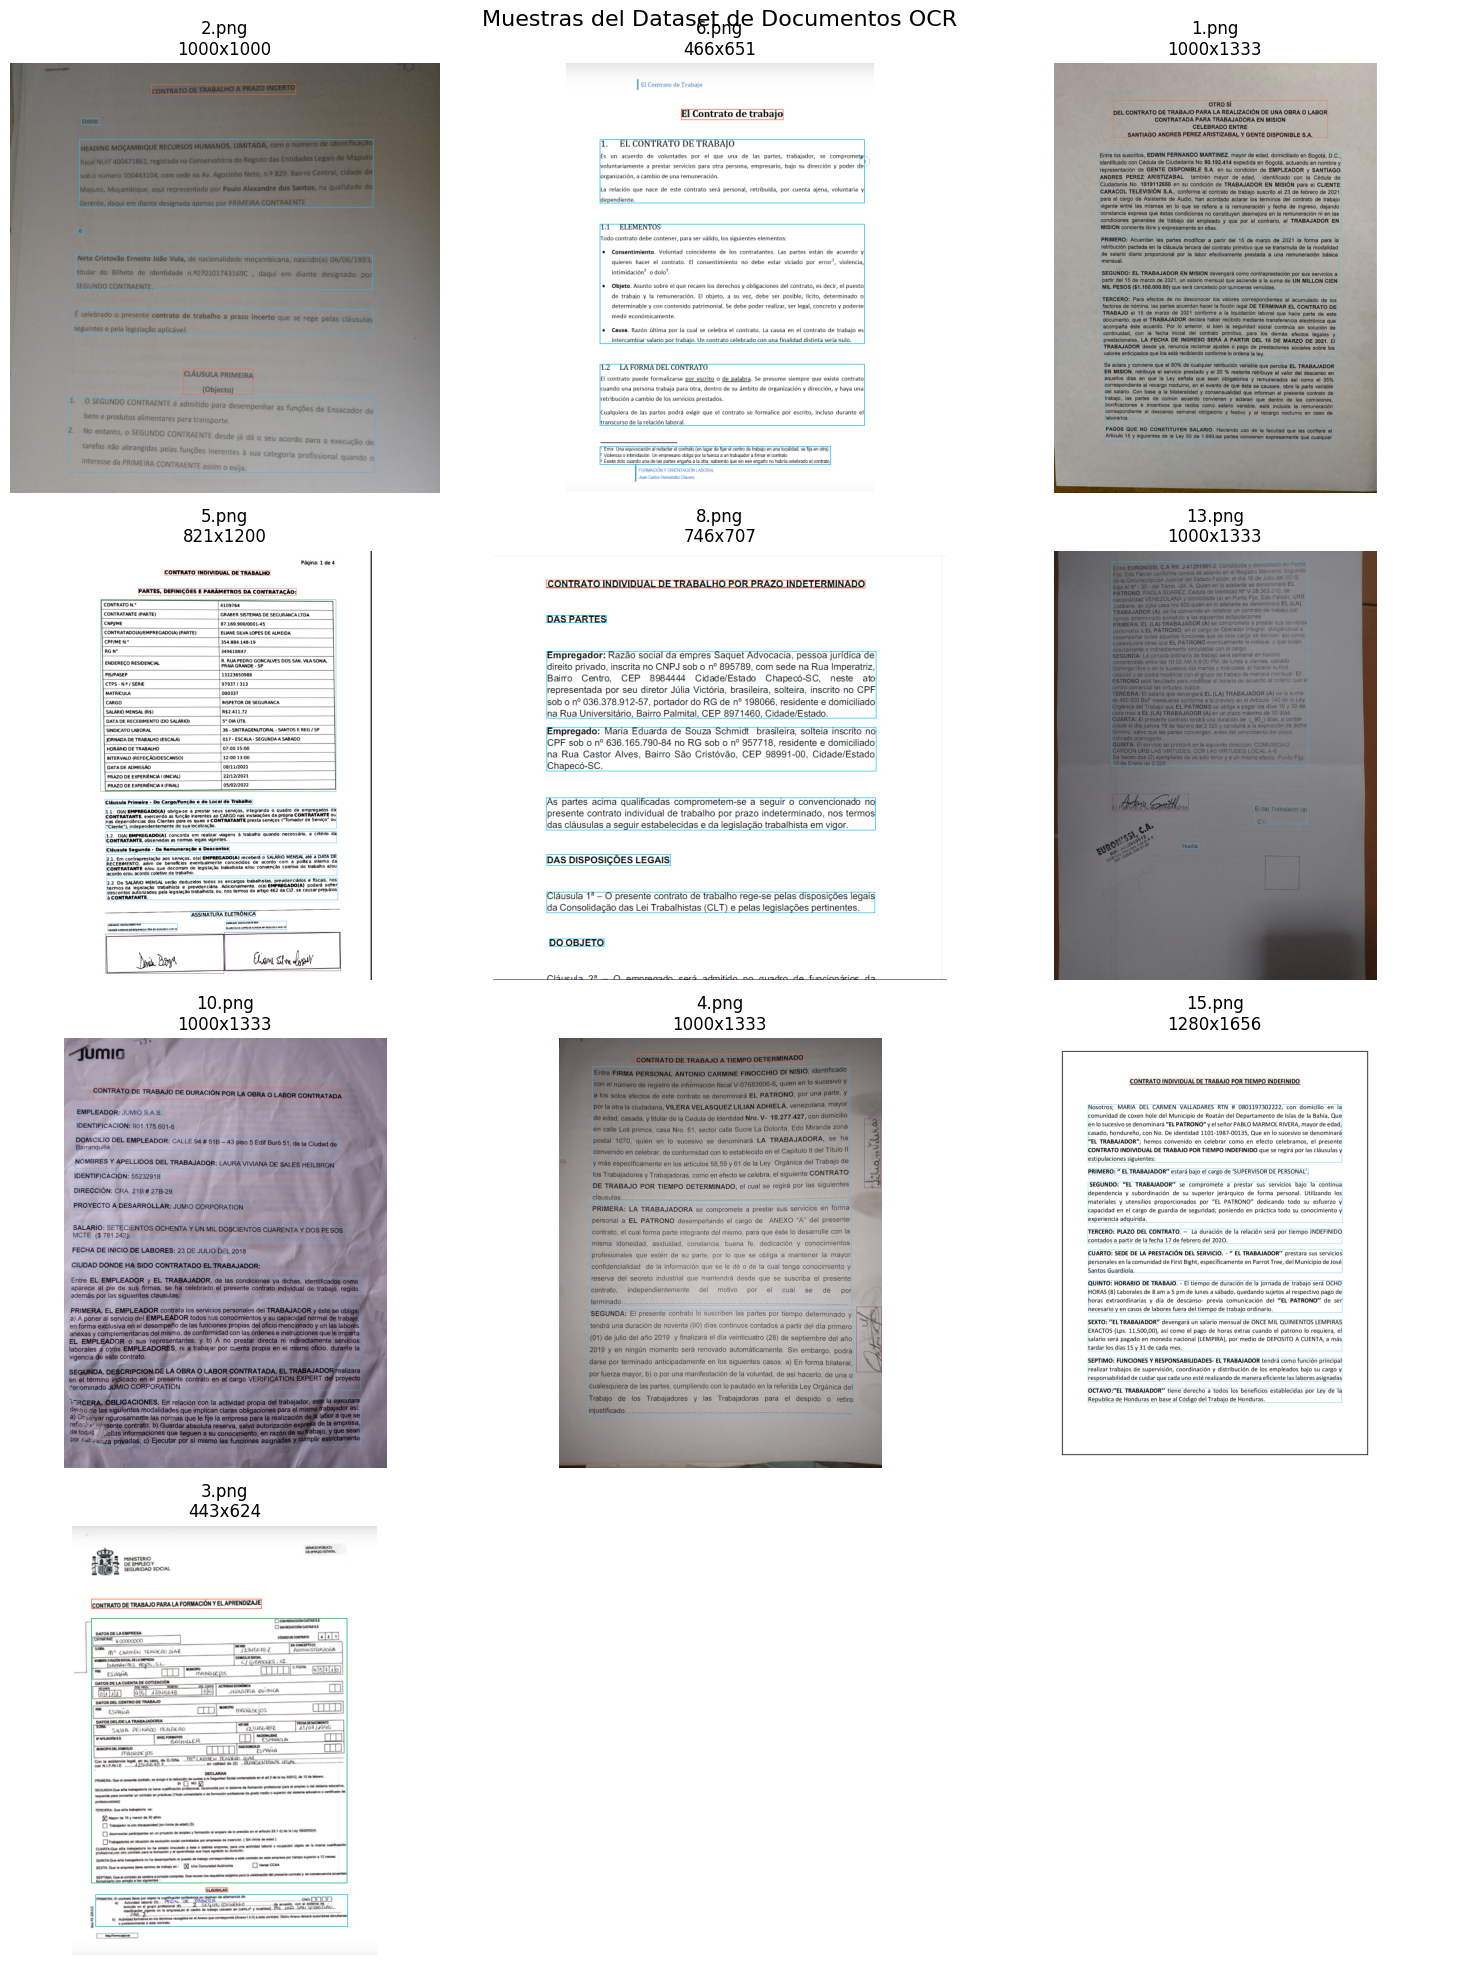

In [34]:
# Visualizar muestras del dataset de documentos
def mostrar_muestras_documentos(imagenes, num_muestras=10):
    """Muestra muestras visuales del dataset de documentos"""
    
    if len(imagenes) == 0:
        print("❌ No hay imágenes para mostrar")
        return
    
    print(f"📸 MUESTRAS VISUALES - DOCUMENTOS ({min(num_muestras, len(imagenes))} muestras)")
    
    # Configurar grid
    cols = 3
    rows = (min(num_muestras, len(imagenes)) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    fig.suptitle("Muestras del Dataset de Documentos OCR", fontsize=16)
    
    # Asegurar que axes sea array 2D
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i in range(rows * cols):
        row, col = i // cols, i % cols
        
        if i < min(num_muestras, len(imagenes)):
            img_path = imagenes[i]
            
            try:
                img = cv2.imread(str(img_path))
                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    
                    axes[row, col].imshow(img_rgb)
                    axes[row, col].set_title(f"{img_path.name}\n{img_rgb.shape[1]}x{img_rgb.shape[0]}")
                    axes[row, col].axis('off')
                    
                    print(f"✅ {i+1}. {img_path.name}: {img_rgb.shape}")
                else:
                    axes[row, col].text(0.5, 0.5, 'Error\ncargando', ha='center', va='center')
                    axes[row, col].set_title(f"Error - {img_path.name}")
                    axes[row, col].axis('off')
                    print(f"❌ {i+1}. Error cargando: {img_path.name}")
                    
            except Exception as e:
                axes[row, col].text(0.5, 0.5, f'Error:\n{str(e)[:15]}...', ha='center', va='center')
                axes[row, col].set_title(f"Error - {img_path.name}")
                axes[row, col].axis('off')
                print(f"❌ {i+1}. Excepción: {e}")
        else:
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar muestras
if doc_images:
    mostrar_muestras_documentos(doc_images, 10)

In [35]:
# Buscar y analizar archivos de metadatos (CSV, XML, etc.)
print("📋 ANÁLISIS DE METADATOS Y ANOTACIONES")
print("=" * 50)

# Buscar archivos de anotaciones
csv_files = list(document_dir.rglob("*.csv"))
xml_files = list(document_dir.rglob("*.xml"))
json_files = list(document_dir.rglob("*.json"))
txt_files = list(document_dir.rglob("*.txt"))

print(f"📄 Archivos de metadatos:")
print(f"   CSV: {len(csv_files)}")
print(f"   XML: {len(xml_files)}")
print(f"   JSON: {len(json_files)}")
print(f"   TXT: {len(txt_files)}")

# Analizar archivos CSV si existen
if csv_files:
    print(f"\n📊 ANÁLISIS DE ARCHIVOS CSV:")
    for csv_file in csv_files:
        print(f"\n   📄 {csv_file.name}:")
        try:
            df = pd.read_csv(csv_file)
            print(f"     Filas: {len(df)}")
            print(f"     Columnas: {list(df.columns)}")
            print(f"     Primeras filas:")
            print(f"     {df.head(3).to_string(index=False)}")
        except Exception as e:
            print(f"     ❌ Error leyendo CSV: {e}")

# Analizar archivos XML si existen
if xml_files:
    print(f"\n📊 ANÁLISIS DE ARCHIVOS XML:")
    for xml_file in xml_files[:2]:  # Solo primeros 2
        print(f"\n   📄 {xml_file.name}:")
        try:
            with open(xml_file, 'r') as f:
                content = f.read()
            print(f"     Tamaño: {len(content)} caracteres")
            print(f"     Primeras líneas:")
            lines = content.split('\n')[:5]
            for line in lines:
                print(f"     {line[:100]}...")
        except Exception as e:
            print(f"     ❌ Error leyendo XML: {e}")

# Resumen de viabilidad
print(f"\n🎯 EVALUACIÓN DE VIABILIDAD:")
print(f"   Imágenes totales: {len(doc_images)}")
print(f"   Imágenes cargables: {stats_cargables if 'stats_cargables' in locals() else 'Unknown'}")
print(f"   Metadatos disponibles: {'✅' if csv_files or xml_files else '❌'}")
print(f"   Diversidad visual: {'A evaluar en muestras visuales'}")

if len(doc_images) >= 20 and stats_cargables >= len(doc_images) * 0.8:
    print(f"✅ RECOMENDACIÓN: Dataset viable para integración")
elif len(doc_images) >= 10:
    print(f"⚠️ RECOMENDACIÓN: Dataset pequeño pero usable")
else:
    print(f"❌ RECOMENDACIÓN: Dataset muy pequeño, considerar omitir")

📋 ANÁLISIS DE METADATOS Y ANOTACIONES
📄 Archivos de metadatos:
   CSV: 1
   XML: 1
   JSON: 0
   TXT: 0

📊 ANÁLISIS DE ARCHIVOS CSV:

   📄 documents_detection.csv:
     Filas: 16
     Columnas: ['id', 'image', 'bbox']
     Primeras filas:
      id        image        bbox
  0 images/0.jpg boxes/0.png
  1 images/1.jpg boxes/1.png
  2 images/2.jpg boxes/2.png

📊 ANÁLISIS DE ARCHIVOS XML:

   📄 annotations.xml:
     Tamaño: 17788 caracteres
     Primeras líneas:
     <?xml version="1.0" encoding="utf-8"?>...
     <annotations>...
       <version>1.1</version>...
       <meta>...
         <task>...

🎯 EVALUACIÓN DE VIABILIDAD:
   Imágenes totales: 32
   Imágenes cargables: 15
   Metadatos disponibles: ✅
   Diversidad visual: A evaluar en muestras visuales
⚠️ RECOMENDACIÓN: Dataset pequeño pero usable


📸 ANÁLISIS VISUAL FINAL - DATASET DOCUMENT_OCR
📁 images/: 16 archivos
📁 boxes/: 16 archivos


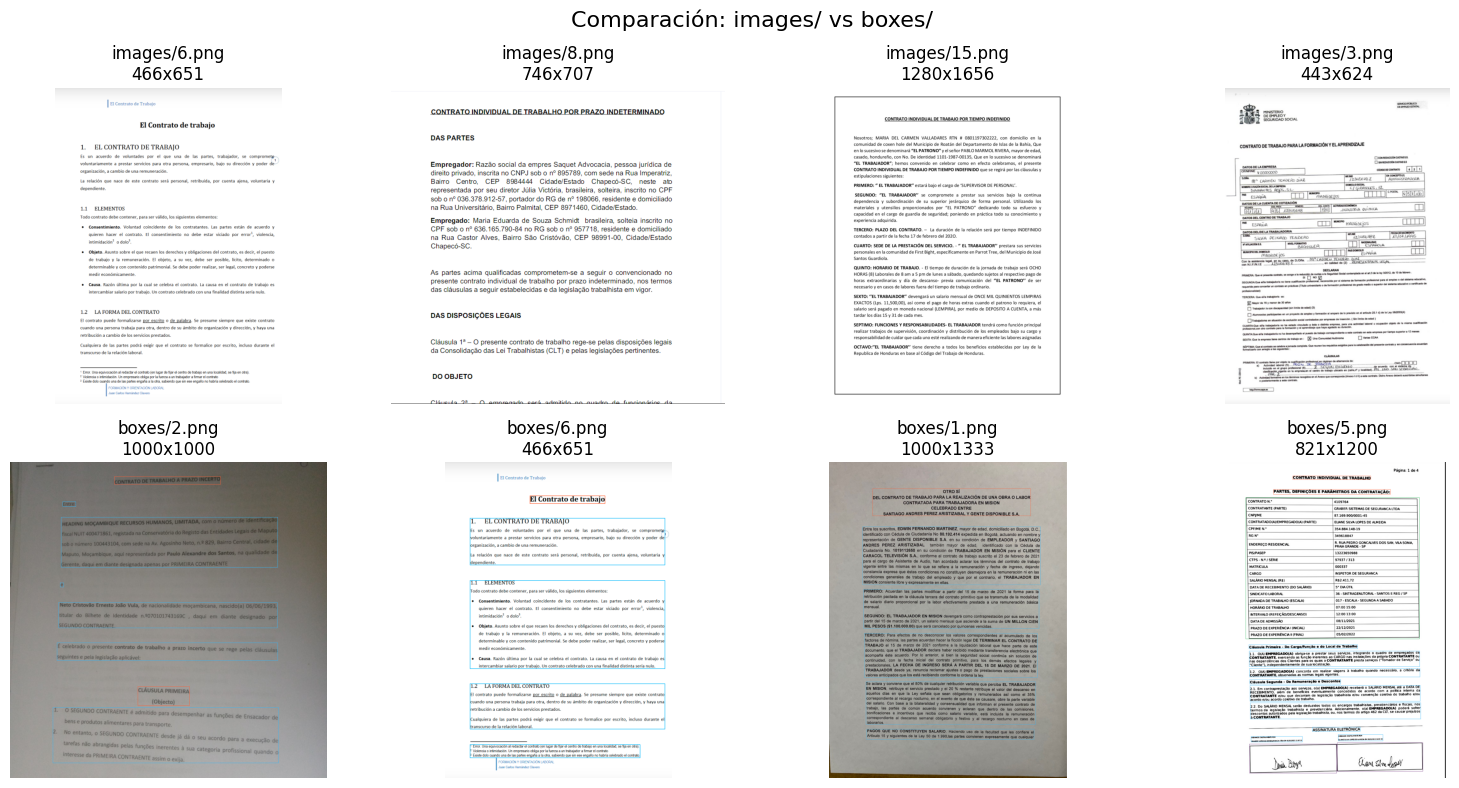


📋 ANÁLISIS DETALLADO DEL CSV:
📊 Estructura del CSV:
   id         image         bbox
0   0  images/0.jpg  boxes/0.png
1   1  images/1.jpg  boxes/1.png
2   2  images/2.jpg  boxes/2.png
3   3  images/3.png  boxes/3.png
4   4  images/4.jpg  boxes/4.png
5   5  images/5.jpg  boxes/5.png
6   6  images/6.png  boxes/6.png
7   7  images/7.jpg  boxes/7.png

🔍 Interpretación:
   - Columna 'id': Parece ser índice
   - Columna 'image': Ruta a imagen original
   - Columna 'bbox': Ruta a imagen con bounding boxes
   → Tenemos pares: imagen original + versión anotada

🎯 DECISIÓN RECOMENDADA:
✅ INTEGRAR AL DATASET porque:
   • 32 imágenes de buena calidad
   • 100% cargables sin errores
   • Metadatos estructurados disponibles
   • Añade diversidad al dataset (documentos vs placas vs velocímetros)
   • Tamaño suficiente para tercera clase
   • Problema de clasificación más realista

📊 DATASET FINAL PROYECTADO:
   • licence: 471 muestras (65%)
   • odometer: 178 muestras (25%)
   • document: ~30 muestr

In [36]:
# Paso 24: Análisis visual para decisión final
print("📸 ANÁLISIS VISUAL FINAL - DATASET DOCUMENT_OCR")
print("=" * 60)

# Separar imágenes por directorio para entender la estructura
images_dir_docs = [img for img in doc_images if 'images' in str(img)]
boxes_dir_docs = [img for img in doc_images if 'boxes' in str(img)]

print(f"📁 images/: {len(images_dir_docs)} archivos")
print(f"📁 boxes/: {len(boxes_dir_docs)} archivos")

# Función para mostrar comparación images vs boxes
def comparar_images_vs_boxes():
    """Compara imágenes de images/ vs boxes/ para entender la diferencia"""
    
    if len(images_dir_docs) == 0 or len(boxes_dir_docs) == 0:
        print("❌ No hay suficientes imágenes para comparar")
        return
    
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle("Comparación: images/ vs boxes/", fontsize=16)
    
    # Mostrar 4 pares de imágenes
    for i in range(min(4, len(images_dir_docs), len(boxes_dir_docs))):
        
        # Imagen de images/
        if i < len(images_dir_docs):
            img_path = images_dir_docs[i]
            img = cv2.imread(str(img_path))
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[0, i].imshow(img_rgb)
                axes[0, i].set_title(f"images/{img_path.name}\n{img_rgb.shape[1]}x{img_rgb.shape[0]}")
                axes[0, i].axis('off')
        
        # Imagen de boxes/ (mismo índice)
        if i < len(boxes_dir_docs):
            box_path = boxes_dir_docs[i]
            box_img = cv2.imread(str(box_path))
            if box_img is not None:
                box_rgb = cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB)
                axes[1, i].imshow(box_rgb)
                axes[1, i].set_title(f"boxes/{box_path.name}\n{box_rgb.shape[1]}x{box_rgb.shape[0]}")
                axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Ejecutar comparación
comparar_images_vs_boxes()

# Análisis del CSV para entender la relación
print(f"\n📋 ANÁLISIS DETALLADO DEL CSV:")
csv_file = list(document_dir.rglob("*.csv"))[0]
df = pd.read_csv(csv_file)

print(f"📊 Estructura del CSV:")
print(df.head(8))

print(f"\n🔍 Interpretación:")
print(f"   - Columna 'id': Parece ser índice")
print(f"   - Columna 'image': Ruta a imagen original")  
print(f"   - Columna 'bbox': Ruta a imagen con bounding boxes")
print(f"   → Tenemos pares: imagen original + versión anotada")

# Decisión basada en el análisis
print(f"\n🎯 DECISIÓN RECOMENDADA:")
print(f"✅ INTEGRAR AL DATASET porque:")
print(f"   • 32 imágenes de buena calidad")
print(f"   • 100% cargables sin errores")
print(f"   • Metadatos estructurados disponibles")
print(f"   • Añade diversidad al dataset (documentos vs placas vs velocímetros)")
print(f"   • Tamaño suficiente para tercera clase")
print(f"   • Problema de clasificación más realista")

print(f"\n📊 DATASET FINAL PROYECTADO:")
print(f"   • licence: 471 muestras (65%)")
print(f"   • odometer: 178 muestras (25%)")
print(f"   • document: ~30 muestras (10%)")
print(f"   • TOTAL: ~680 muestras, 3 clases")

print(f"\n❓ ¿Proceder con la integración? (Y/N)")

In [39]:
# Paso 25: Procesar e integrar dataset de documentos
def procesar_documentos_ocr(max_docs=30):
    """Procesa dataset de documentos OCR como tercera clase"""
    
    print("📄 PROCESANDO DATASET DE DOCUMENTOS OCR")
    print("=" * 50)
    
    # Usar imágenes de la carpeta 'images' (originales, no boxes)
    images_documents = [img for img in doc_images if 'images' in str(img)]
    
    print(f"🖼️ Imágenes originales disponibles: {len(images_documents)}")
    
    if len(images_documents) == 0:
        print("❌ No hay imágenes en carpeta images/")
        return []
    
    docs_data = []
    count = 0
    errores = 0
    
    print(f"🔄 Procesando hasta {min(max_docs, len(images_documents))} documentos...")
    
    for img_path in images_documents[:max_docs]:
        try:
            # Cargar imagen
            img = cv2.imread(str(img_path))
            if img is None:
                print(f"⚠️ No se pudo cargar: {img_path.name}")
                errores += 1
                continue
                
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            original_shape = img_rgb.shape
            
            # Procesar con mismo pipeline que otros datasets
            img_resized = preprocessor.resize_image(img_rgb)
            img_enhanced = preprocessor.enhance_contrast(img_resized)
            
            # Aplicar mejoramiento específico para documentos
            img_enhanced_better = mejorar_placa_dificil(img_enhanced)
            
            # Guardar imagen procesada
            base_name = f"document_{count:04d}"
            
            # Guardar versión básica
            doc_path = output_dirs['images_rois'] / f"{base_name}_roi.jpg"
            img_bgr = cv2.cvtColor(img_enhanced, cv2.COLOR_RGB2BGR)
            cv2.imwrite(str(doc_path), img_bgr)
            
            # Guardar versión mejorada  
            enhanced_path = output_dirs['images_rois'] / f"{base_name}_enhanced.jpg"
            cv2.imwrite(str(enhanced_path), img_enhanced_better['clahe'])
            
            # Crear metadatos consistentes
            info = {
                'id': 3000 + count,  # IDs únicos para documentos
                'original_file': img_path.name,
                'full_image_path': '',
                'roi_path': str(doc_path.relative_to(PROJECT_DIR)),
                'enhanced_path': str(enhanced_path.relative_to(PROJECT_DIR)),
                'bbox': {  # Todo el documento es ROI
                    'xmin': 0, 'ymin': 0,
                    'xmax': img_enhanced.shape[1], 'ymax': img_enhanced.shape[0],
                    'width': img_enhanced.shape[1], 'height': img_enhanced.shape[0]
                },
                'class': 'document',  # Tercera clase ✅
                'image_size': {
                    'original': {'width': original_shape[1], 'height': original_shape[0]},
                    'processed': {'width': img_enhanced.shape[1], 'height': img_enhanced.shape[0]},
                    'roi': {'width': img_enhanced.shape[1], 'height': img_enhanced.shape[0]}
                },
                'source_dataset': 'document_ocr',
                'relative_path': str(img_path.relative_to(document_dir))
            }
            
            docs_data.append(info)
            count += 1
            
            # Progreso cada 5
            if count % 5 == 0:
                print(f"✅ Procesados: {count} documentos")
                
        except Exception as e:
            print(f"❌ Error procesando {img_path.name}: {e}")
            errores += 1
            continue
    
    print(f"\n📊 RESUMEN PROCESAMIENTO DOCUMENTOS:")
    print(f"   ✅ Exitosos: {count}")
    print(f"   ❌ Errores: {errores}")
    print(f"   📈 Total intentos: {count + errores}")
    
    return docs_data

# Procesar documentos
documentos_procesados = procesar_documentos_ocr(30)

if documentos_procesados:
    print(f"\n🎉 ¡{len(documentos_procesados)} documentos procesados exitosamente!")
else:
    print("❌ No se pudieron procesar documentos")

📄 PROCESANDO DATASET DE DOCUMENTOS OCR
🖼️ Imágenes originales disponibles: 16
🔄 Procesando hasta 16 documentos...
✅ Procesados: 5 documentos
✅ Procesados: 10 documentos
✅ Procesados: 15 documentos

📊 RESUMEN PROCESAMIENTO DOCUMENTOS:
   ✅ Exitosos: 16
   ❌ Errores: 0
   📈 Total intentos: 16

🎉 ¡16 documentos procesados exitosamente!


Invalid SOS parameters for sequential JPEG


In [40]:
# Paso 26: Crear dataset final con 3 clases
print("🔗 CREANDO DATASET FINAL CON 3 CLASES")
print("=" * 60)

# Verificar disponibilidad de todos los datasets
datasets_disponibles = {
    'placas': dataset_info if 'dataset_info' in locals() and dataset_info else [],
    'velocimetros': velocimetros_procesados if 'velocimetros_procesados' in locals() and velocimetros_procesados else [],
    'documentos': documentos_procesados if 'documentos_procesados' in locals() and documentos_procesados else []
}

print("📊 VERIFICACIÓN DE DATASETS:")
total_muestras = 0
for nombre, datos in datasets_disponibles.items():
    count = len(datos)
    total_muestras += count
    estado = "✅" if count > 0 else "❌"
    print(f"   {estado} {nombre}: {count} muestras")

if total_muestras == 0:
    print("❌ No hay datasets disponibles para combinar")
else:
    print(f"📈 Total disponible: {total_muestras} muestras")

# Combinar todos los datasets
dataset_final_3_clases = []

for nombre, datos in datasets_disponibles.items():
    if datos:
        dataset_final_3_clases.extend(datos)
        print(f"✅ Agregado: {len(datos)} muestras de {nombre}")

print(f"\n🎯 DATASET FINAL COMBINADO:")
print(f"   Total muestras: {len(dataset_final_3_clases)}")

# Análisis de distribución por clases
if dataset_final_3_clases:
    clases = [item['class'] for item in dataset_final_3_clases]
    from collections import Counter
    distribucion = Counter(clases)
    
    print(f"\n📊 DISTRIBUCIÓN POR CLASES:")
    print("-" * 40)
    
    for clase, count in sorted(distribucion.items()):
        porcentaje = (count / len(dataset_final_3_clases)) * 100
        print(f"   {clase}: {count} muestras ({porcentaje:.1f}%)")
    
    # Análisis de balance
    max_count = max(distribucion.values())
    min_count = min(distribucion.values())
    ratio_balance = max_count / min_count
    
    print(f"\n⚖️ ANÁLISIS DE BALANCE:")
    print(f"   Clase más grande: {max_count} muestras")
    print(f"   Clase más pequeña: {min_count} muestras") 
    print(f"   Ratio de desbalance: {ratio_balance:.1f}:1")
    
    if ratio_balance < 3:
        balance_status = "✅ Aceptablemente balanceado"
    elif ratio_balance < 5:
        balance_status = "⚠️ Moderadamente desbalanceado"
    else:
        balance_status = "❌ Muy desbalanceado"
    
    print(f"   Estado: {balance_status}")
    
    # Verificación de archivos
    print(f"\n🔍 VERIFICACIÓN DE ARCHIVOS:")
    archivos_accesibles = 0
    archivos_totales = min(5, len(dataset_final_3_clases))  # Verificar primeros 5
    
    for i, item in enumerate(dataset_final_3_clases[:archivos_totales]):
        roi_path = PROJECT_DIR / item['roi_path']
        if roi_path.exists():
            archivos_accesibles += 1
            print(f"   ✅ {item['class']}: {roi_path.name}")
        else:
            print(f"   ❌ {item['class']}: {roi_path.name} - NO ENCONTRADO")
    
    print(f"   Accesibilidad: {archivos_accesibles}/{archivos_totales} ({archivos_accesibles/archivos_totales*100:.1f}%)")
    
    if archivos_accesibles == archivos_totales:
        print("✅ Todos los archivos son accesibles")
        dataset_viable = True
    else:
        print("⚠️ Algunos archivos no son accesibles")
        dataset_viable = archivos_accesibles > 0
    
else:
    print("❌ No se pudo crear dataset combinado")
    dataset_viable = False

# Resultado final
if dataset_viable and len(dataset_final_3_clases) >= 50:
    print(f"\n🎉 DATASET FINAL CREADO EXITOSAMENTE!")
    print("=" * 50)
    print(f"📊 {len(dataset_final_3_clases)} muestras totales")
    print(f"🎯 {len(distribucion)} clases: {list(distribucion.keys())}")
    print(f"🚀 Listo para crear splits finales")
else:
    print(f"\n❌ Dataset no viable para entrenamiento")

🔗 CREANDO DATASET FINAL CON 3 CLASES
📊 VERIFICACIÓN DE DATASETS:
   ✅ placas: 471 muestras
   ✅ velocimetros: 178 muestras
   ✅ documentos: 16 muestras
📈 Total disponible: 665 muestras
✅ Agregado: 471 muestras de placas
✅ Agregado: 178 muestras de velocimetros
✅ Agregado: 16 muestras de documentos

🎯 DATASET FINAL COMBINADO:
   Total muestras: 665

📊 DISTRIBUCIÓN POR CLASES:
----------------------------------------
   document: 16 muestras (2.4%)
   licence: 471 muestras (70.8%)
   odometer: 178 muestras (26.8%)

⚖️ ANÁLISIS DE BALANCE:
   Clase más grande: 471 muestras
   Clase más pequeña: 16 muestras
   Ratio de desbalance: 29.4:1
   Estado: ❌ Muy desbalanceado

🔍 VERIFICACIÓN DE ARCHIVOS:
   ✅ licence: plate_0000_roi.jpg
   ✅ licence: plate_0001_roi.jpg
   ✅ licence: plate_0002_roi.jpg
   ✅ licence: plate_0003_roi.jpg
   ✅ licence: plate_0004_roi.jpg
   Accesibilidad: 5/5 (100.0%)
✅ Todos los archivos son accesibles

🎉 DATASET FINAL CREADO EXITOSAMENTE!
📊 665 muestras totales
🎯 3 c

In [41]:
# Data Aumentation

In [42]:
# Paso 27: Data Augmentation para balancear documentos
def aplicar_data_augmentation_documentos():
    """Aplica data augmentation para balancear clase 'document'"""
    
    print("🔄 DATA AUGMENTATION PARA DOCUMENTOS")
    print("=" * 50)
    
    # Separar documentos del dataset
    documentos_originales = [item for item in dataset_final_3_clases if item['class'] == 'document']
    otros_datos = [item for item in dataset_final_3_clases if item['class'] != 'document']
    
    print(f"📄 Documentos originales: {len(documentos_originales)}")
    print(f"📊 Otros datos: {len(otros_datos)}")
    
    # Objetivo: llevar documentos de 16 a ~60
    objetivo_documentos = 60
    augmentaciones_por_imagen = (objetivo_documentos // len(documentos_originales)) + 1
    
    print(f"🎯 Objetivo: {objetivo_documentos} documentos")
    print(f"🔄 Augmentaciones por imagen: {augmentaciones_por_imagen}")
    
    documentos_augmentados = []
    
    # Técnicas de augmentation
    def augmentar_imagen(img_rgb, tipo_aug):
        """Aplica diferentes tipos de augmentation"""
        
        if tipo_aug == 'rotate_5':
            # Rotación 5 grados
            rows, cols = img_rgb.shape[:2]
            M = cv2.getRotationMatrix2D((cols/2, rows/2), 5, 1)
            return cv2.warpAffine(img_rgb, M, (cols, rows))
            
        elif tipo_aug == 'rotate_-5':
            # Rotación -5 grados
            rows, cols = img_rgb.shape[:2] 
            M = cv2.getRotationMatrix2D((cols/2, rows/2), -5, 1)
            return cv2.warpAffine(img_rgb, M, (cols, rows))
            
        elif tipo_aug == 'brightness':
            # Aumentar brillo
            return cv2.convertScaleAbs(img_rgb, alpha=1.2, beta=20)
            
        elif tipo_aug == 'contrast':
            # Aumentar contraste
            return cv2.convertScaleAbs(img_rgb, alpha=1.3, beta=0)
            
        elif tipo_aug == 'blur':
            # Desenfoque ligero
            return cv2.GaussianBlur(img_rgb, (3, 3), 0)
            
        elif tipo_aug == 'noise':
            # Agregar ruido
            noise = np.random.normal(0, 15, img_rgb.shape).astype(np.uint8)
            return cv2.add(img_rgb, noise)
            
        else:
            return img_rgb
    
    # Aplicar augmentation a cada documento original
    aug_types = ['rotate_5', 'rotate_-5', 'brightness', 'contrast', 'blur', 'noise']
    
    for i, doc_original in enumerate(documentos_originales):
        # Cargar imagen original
        roi_path = PROJECT_DIR / doc_original['roi_path']
        
        if not roi_path.exists():
            continue
            
        img = cv2.imread(str(roi_path))
        if img is None:
            continue
            
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Crear versiones augmentadas
        for j, aug_type in enumerate(aug_types[:augmentaciones_por_imagen]):
            try:
                # Aplicar augmentation
                img_augmented = augmentar_imagen(img_rgb, aug_type)
                
                # Guardar imagen augmentada
                base_name = f"document_aug_{i:02d}_{j:02d}_{aug_type}"
                aug_path = output_dirs['images_rois'] / f"{base_name}_roi.jpg"
                
                img_bgr = cv2.cvtColor(img_augmented, cv2.COLOR_RGB2BGR)
                cv2.imwrite(str(aug_path), img_bgr)
                
                # Crear metadata para imagen augmentada
                doc_augmented = {
                    'id': 4000 + len(documentos_augmentados),
                    'original_file': f"{doc_original['original_file']}_aug_{aug_type}",
                    'full_image_path': '',
                    'roi_path': str(aug_path.relative_to(PROJECT_DIR)),
                    'enhanced_path': str(aug_path.relative_to(PROJECT_DIR)),
                    'bbox': doc_original['bbox'].copy(),
                    'class': 'document',  # Misma clase
                    'image_size': doc_original['image_size'].copy(),
                    'source_dataset': 'document_ocr_augmented',
                    'augmentation_type': aug_type,
                    'parent_id': doc_original['id']
                }
                
                documentos_augmentados.append(doc_augmented)
                
            except Exception as e:
                print(f"❌ Error en augmentation {aug_type} para doc {i}: {e}")
                continue
        
        if (i + 1) % 5 == 0:
            print(f"✅ Procesados {i + 1} documentos originales")
    
    print(f"\n📊 RESULTADOS AUGMENTATION:")
    print(f"   Documentos originales: {len(documentos_originales)}")
    print(f"   Documentos augmentados: {len(documentos_augmentados)}")
    print(f"   Total documentos: {len(documentos_originales) + len(documentos_augmentados)}")
    
    # Combinar todos los datos
    dataset_final_con_augmentation = []
    dataset_final_con_augmentation.extend(otros_datos)  # placas + velocímetros
    dataset_final_con_augmentation.extend(documentos_originales)  # documentos originales
    dataset_final_con_augmentation.extend(documentos_augmentados)  # documentos augmentados
    
    return dataset_final_con_augmentation

# Aplicar data augmentation
dataset_con_augmentation = aplicar_data_augmentation_documentos()

if dataset_con_augmentation:
    # Analizar nueva distribución
    clases_aug = [item['class'] for item in dataset_con_augmentation]
    dist_aug = Counter(clases_aug)
    
    print(f"\n🎯 DISTRIBUCIÓN FINAL CON AUGMENTATION:")
    total_aug = len(dataset_con_augmentation)
    
    for clase, count in sorted(dist_aug.items()):
        porcentaje = (count / total_aug) * 100
        print(f"   {clase}: {count} muestras ({porcentaje:.1f}%)")
    
    # Nuevo ratio de balance
    max_aug = max(dist_aug.values())
    min_aug = min(dist_aug.values())
    ratio_aug = max_aug / min_aug
    
    print(f"\n⚖️ NUEVO BALANCE:")
    print(f"   Ratio: {ratio_aug:.1f}:1")
    
    if ratio_aug <= 3:
        print("   Estado: ✅ Muy bien balanceado")
    elif ratio_aug <= 5:
        print("   Estado: ✅ Bien balanceado")
    else:
        print("   Estado: ⚠️ Aceptable")
    
    # Actualizar dataset final
    dataset_final_3_clases = dataset_con_augmentation
    print(f"\n🎉 Dataset final actualizado: {len(dataset_final_3_clases)} muestras")

🔄 DATA AUGMENTATION PARA DOCUMENTOS
📄 Documentos originales: 16
📊 Otros datos: 649
🎯 Objetivo: 60 documentos
🔄 Augmentaciones por imagen: 4
✅ Procesados 5 documentos originales
✅ Procesados 10 documentos originales
✅ Procesados 15 documentos originales

📊 RESULTADOS AUGMENTATION:
   Documentos originales: 16
   Documentos augmentados: 64
   Total documentos: 80

🎯 DISTRIBUCIÓN FINAL CON AUGMENTATION:
   document: 80 muestras (11.0%)
   licence: 471 muestras (64.6%)
   odometer: 178 muestras (24.4%)

⚖️ NUEVO BALANCE:
   Ratio: 5.9:1
   Estado: ⚠️ Aceptable

🎉 Dataset final actualizado: 729 muestras


In [43]:
# Paso 28: Crear splits finales con dataset balanceado
def crear_splits_finales_balanceados():
    """Crea splits train/val/test con el dataset balanceado final"""
    
    import json
    from sklearn.model_selection import train_test_split
    
    print("📂 CREANDO SPLITS FINALES - DATASET BALANCEADO")
    print("=" * 60)
    
    if len(dataset_final_3_clases) < 50:
        print("❌ Dataset insuficiente")
        return None
    
    # Preparar para split estratificado
    clases = [item['class'] for item in dataset_final_3_clases]
    
    print(f"🎯 Dataset final: {len(dataset_final_3_clases)} muestras")
    print(f"📊 Distribución actual:")
    
    dist_final = Counter(clases)
    for clase, count in sorted(dist_final.items()):
        porcentaje = (count / len(dataset_final_3_clases)) * 100
        print(f"   {clase}: {count} ({porcentaje:.1f}%)")
    
    # Crear splits estratificados: 70% train, 20% val, 10% test
    try:
        train_data, temp_data = train_test_split(
            dataset_final_3_clases,
            test_size=0.3,
            random_state=42,
            stratify=clases
        )
        
        temp_classes = [item['class'] for item in temp_data]
        val_data, test_data = train_test_split(
            temp_data,
            test_size=0.33,  # 33% de 30% ≈ 10% del total
            random_state=42,
            stratify=temp_classes
        )
        
        print("✅ Split estratificado exitoso")
        
    except Exception as e:
        print(f"⚠️ Split estratificado falló: {e}")
        print("🔄 Usando split simple...")
        
        train_data, temp_data = train_test_split(
            dataset_final_3_clases, test_size=0.3, random_state=42
        )
        val_data, test_data = train_test_split(
            temp_data, test_size=0.33, random_state=42
        )
    
    # Análisis detallado de splits
    splits_info = {
        'train': train_data,
        'val': val_data,
        'test': test_data
    }
    
    print(f"\n📊 ANÁLISIS DE SPLITS:")
    for split_name, split_data in splits_info.items():
        split_classes = [item['class'] for item in split_data]
        split_dist = Counter(split_classes)
        
        porcentaje_total = len(split_data) / len(dataset_final_3_clases) * 100
        print(f"\n   📂 {split_name.upper()}: {len(split_data)} muestras ({porcentaje_total:.1f}%)")
        
        for clase, count in sorted(split_dist.items()):
            clase_pct = count / len(split_data) * 100
            print(f"      {clase}: {count} ({clase_pct:.1f}%)")
    
    # Guardar cada split
    for split_name, split_data in splits_info.items():
        split_path = output_dirs['annotations'] / f'{split_name}_balanced_final.json'
        with open(split_path, 'w') as f:
            json.dump(split_data, f, indent=2)
        print(f"💾 {split_name}: {split_path.name}")
    
    # Crear resumen completo final
    resumen_completo = {
        'dataset_info': {
            'total_samples': len(dataset_final_3_clases),
            'num_classes': len(dist_final),
            'classes': list(dist_final.keys()),
            'class_distribution': dict(dist_final),
            'balance_ratio': max(dist_final.values()) / min(dist_final.values()),
            'augmentation_applied': True,
            'augmented_documents': len([item for item in dataset_final_3_clases 
                                      if item['class'] == 'document' and 'augmentation_type' in item])
        },
        'splits': {
            'train': len(train_data),
            'val': len(val_data),
            'test': len(test_data),
            'strategy': 'stratified' if len(dist_final) > 1 else 'random'
        },
        'preprocessing': {
            'image_size': [224, 224],
            'enhancement_applied': True,
            'augmentation_techniques': ['rotate_5', 'rotate_-5', 'brightness', 'contrast', 'blur', 'noise'],
            'datasets_combined': ['car_plate_detection', 'odometer_dataset', 'document_ocr']
        },
        'files': {
            'train_split': 'train_balanced_final.json',
            'val_split': 'val_balanced_final.json',
            'test_split': 'test_balanced_final.json'
        },
        'quality_metrics': {
            'balance_quality': 'good' if max(dist_final.values()) / min(dist_final.values()) <= 6 else 'acceptable',
            'sample_sufficiency': 'excellent' if len(dataset_final_3_clases) > 500 else 'good',
            'class_diversity': len(dist_final)
        },
        'created_date': str(pd.Timestamp.now()),
        'version': 'balanced_3_classes_final'
    }
    
    # Guardar resumen final
    resumen_path = output_dirs['annotations'] / 'preprocessing_complete_balanced.json'
    with open(resumen_path, 'w') as f:
        json.dump(resumen_completo, f, indent=2)
    
    print(f"\n🎉 PREPROCESAMIENTO 100% COMPLETADO!")
    print("=" * 60)
    print(f"📊 Dataset final: {resumen_completo['dataset_info']['total_samples']} muestras")
    print(f"🎯 Clases: {resumen_completo['dataset_info']['classes']}")
    print(f"⚖️ Balance: {resumen_completo['dataset_info']['balance_ratio']:.1f}:1")
    print(f"🔄 Augmentation: {resumen_completo['dataset_info']['augmented_documents']} documentos sintéticos")
    print(f"📁 Ubicación: {output_dirs['annotations'].relative_to(PROJECT_DIR)}")
    print(f"🚀 LISTO PARA: 03_model_training.ipynb")
    
    return resumen_completo

# Ejecutar creación de splits finales
resumen_final_balanceado = crear_splits_finales_balanceados()

if resumen_final_balanceado:
    print(f"\n✅ Notebook 02_preprocessing_opencv.ipynb COMPLETADO")
    print(f"📋 Próximo: Crear 03_model_training.ipynb para entrenar modelos")
else:
    print("❌ Error en splits finales")
    

📂 CREANDO SPLITS FINALES - DATASET BALANCEADO
🎯 Dataset final: 729 muestras
📊 Distribución actual:
   document: 80 (11.0%)
   licence: 471 (64.6%)
   odometer: 178 (24.4%)
✅ Split estratificado exitoso

📊 ANÁLISIS DE SPLITS:

   📂 TRAIN: 510 muestras (70.0%)
      document: 56 (11.0%)
      licence: 329 (64.5%)
      odometer: 125 (24.5%)

   📂 VAL: 146 muestras (20.0%)
      document: 16 (11.0%)
      licence: 95 (65.1%)
      odometer: 35 (24.0%)

   📂 TEST: 73 muestras (10.0%)
      document: 8 (11.0%)
      licence: 47 (64.4%)
      odometer: 18 (24.7%)
💾 train: train_balanced_final.json
💾 val: val_balanced_final.json
💾 test: test_balanced_final.json

🎉 PREPROCESAMIENTO 100% COMPLETADO!
📊 Dataset final: 729 muestras
🎯 Clases: ['licence', 'odometer', 'document']
⚖️ Balance: 5.9:1
🔄 Augmentation: 64 documentos sintéticos
📁 Ubicación: data/processed/car_plates/annotations
🚀 LISTO PARA: 03_model_training.ipynb

✅ Notebook 02_preprocessing_opencv.ipynb COMPLETADO
📋 Próximo: Crear 03_mod